In [1]:
import anndata as ad
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import anndata
import inspect
%load_ext autoreload

%autoreload 2
from spatial_compare import spatial_compare,find_matched_groups

In [10]:
#ad0 = ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/brianl/marmoset_pilot/mapping/xenium_siletti_AIT115.h5ad")
#ad1 = ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/mFISH/brianl/marmoset_pilot/mapping/merscope_mapped_Siletti_AIT115.h5ad")

ad_source = ad.read_h5ad("/Users/brianl/projects/marmoset_h5ad/xenium_sis_compare.h5ad")
ad0 = ad_source[ad_source.obs.segmentation=="10x"].copy()
ad1 = ad_source[ad_source.obs.segmentation=="spots_in_space"].copy()

In [40]:
ad1.obs.columns

Index(['EntityID', 'fov_x', 'volume_x', 'center_x_x', 'center_y_x', 'min_x_x',
       'min_y_x', 'max_x_x', 'max_y_x', 'anisotropy_x', 'transcript_count_x',
       'perimeter_area_ratio_x', 'solidity_x', 'Aux2_raw_x',
       'Aux2_high_pass_x', 'DAPI_raw_x', 'DAPI_high_pass_x', 'Aux3_raw_x',
       'Aux3_high_pass_x', 'Aux1_raw_x', 'Aux1_high_pass_x', 'PolyT_raw_x',
       'PolyT_high_pass_x', 'cell_x', 'C2H7orf50_x', 'filename_x', 'cell_id_x',
       'level1.class_label_name', 'level1.class_label_avg_correlation',
       'level2.neighborhood_label_name',
       'level2.neighborhood_label_avg_correlation',
       'level3.subclass_label_name', 'level3.subclass_label_avg_correlation',
       'cluster_label_name', 'cluster_label_avg_correlation', 'fov_y',
       'volume_y', 'center_x_y', 'center_y_y', 'min_x_y', 'min_y_y', 'max_x_y',
       'max_y_y', 'anisotropy_y', 'transcript_count_y',
       'perimeter_area_ratio_y', 'solidity_y', 'Aux2_raw_y',
       'Aux2_high_pass_y', 'DAPI_raw_y',

In [41]:
x_files = ad0.obs.filename.unique()
m_files = ad1.obs.filename.unique()
corrs = np.zeros([len(x_files), len(m_files)])
max_match=[]
for ii,x_f in  enumerate(x_files):
    for jj,m_f in enumerate(m_files):
        mx = find_matched_groups(ad0.obs.loc[ad0.obs.filename==x_f,:], 
                                 ad1.obs.loc[ad1.obs.filename==m_f,:],
                                 category ="supercluster_name")
        corrs[ii,jj] = mx["proportion_correlation"]
    if max(corrs[ii,:]) < 0.8:
        print("skipping "+x_f)
        continue
    else:
        max_match.append([x_f, m_files[np.argmax(corrs[ii,:])]])

skipping output-XETG00214__0004181__1336333250__20240328__184344
skipping output-XETG00044__0004272__7-06__20240321__231121
skipping output-XETG00210__0024811__4-06__20240320__185841
skipping output-XETG00220__0004431__Region_1__20240320__185505
skipping output-XETG00210__0024844__3-06__20240320__185841
skipping output-XETG00044__0025057__4106__20240307__194733
skipping output-XETG00044__0025061__4206__20240307__194733


In [42]:
max_match

[['output-XETG00210__0004505__1336335738__20240327__182256', '1336335378'],
 ['output-XETG00044__0004263__1336335223__20240327__181422', '1336335378'],
 ['output-XETG00220__0004098__1336332606__20240328__183748', '1336332596'],
 ['output-XETG00210__0004543__1336335389__20240327__182256', '1336335378'],
 ['output-XETG00220__0004412__Region_1__20240320__185505', '1336328944'],
 ['output-XETG00044__0004400__8-06__20240321__231121', '1334050835'],
 ['output-XETG00214__0004499__1336333470__20240328__184344', '1336332596'],
 ['output-XETG00220__0004427__1336332887__20240328__183748', '1336332596']]

['output-XETG00210__0004543__1336335389__20240327__182256', '1336335378']
167


/home/brianl/projects/spatial_compare/spatial_compare.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


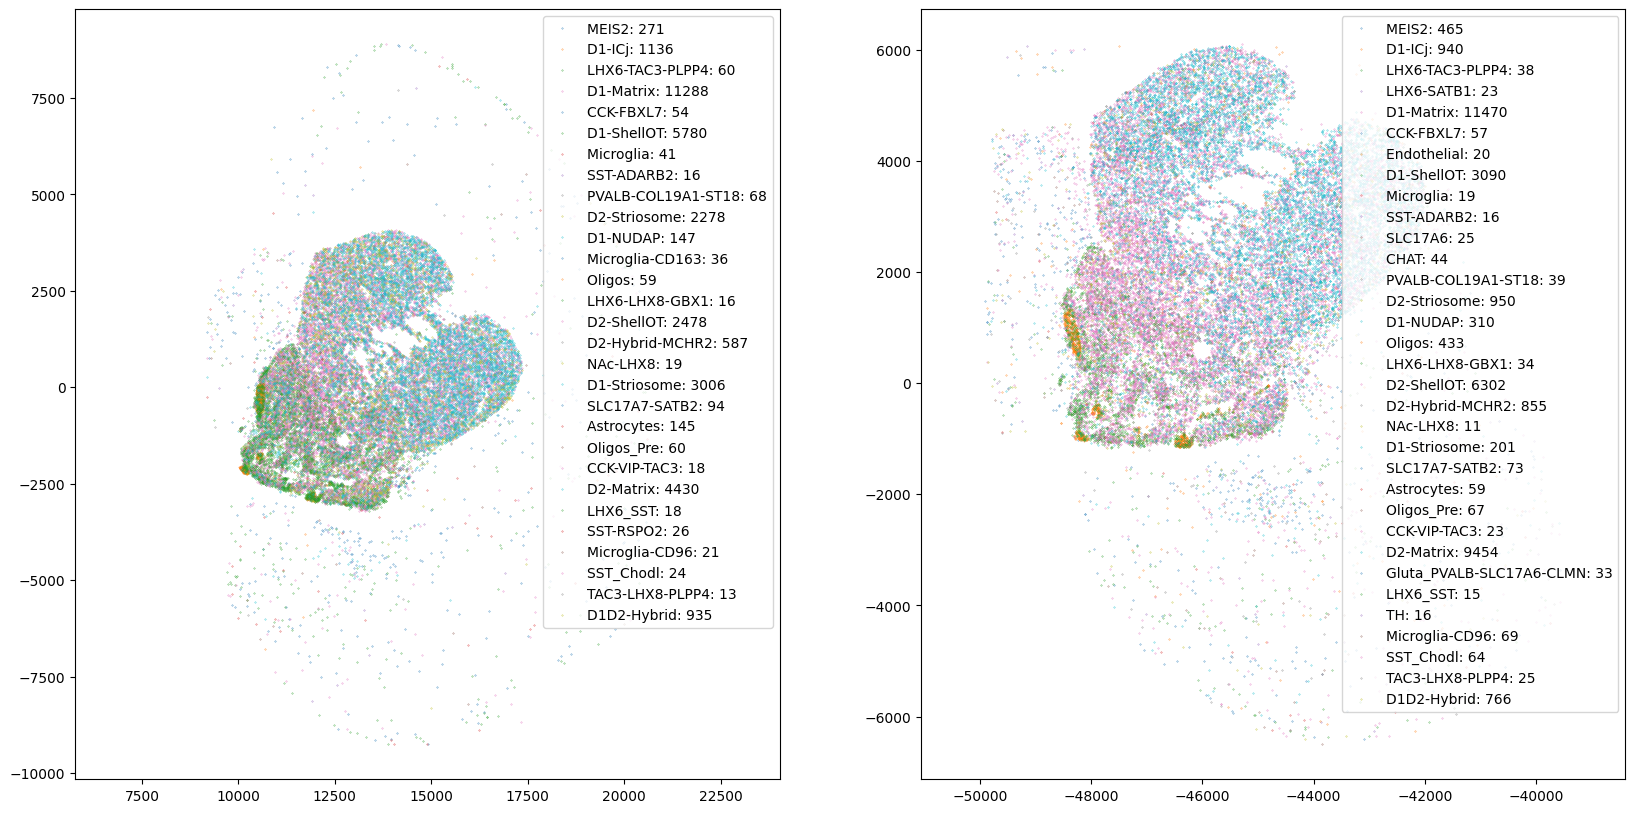

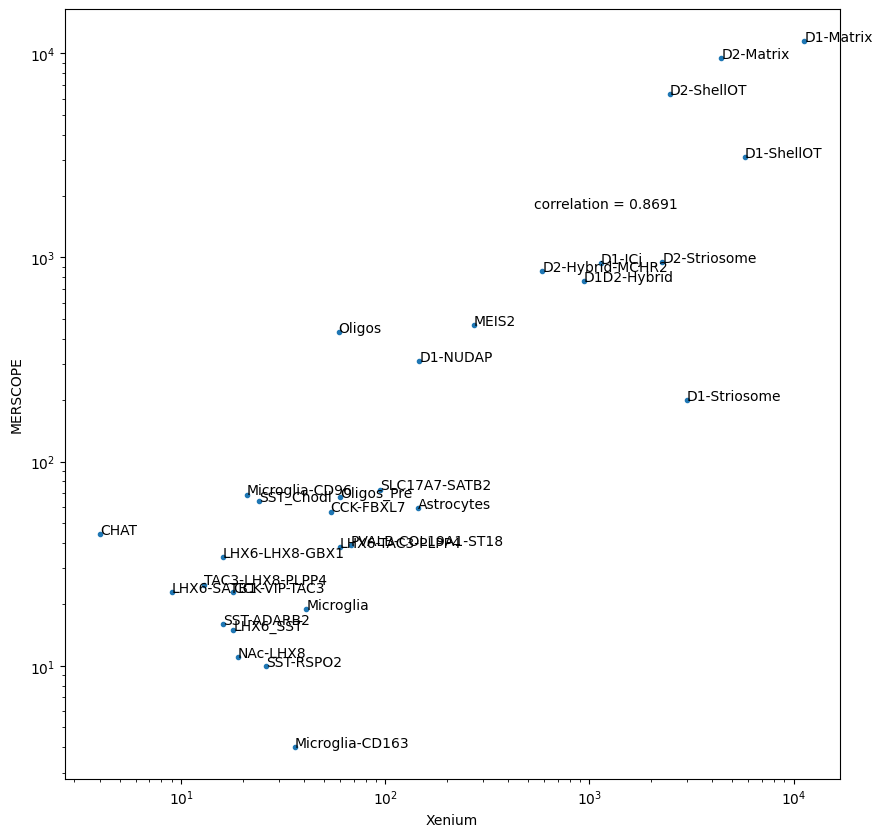

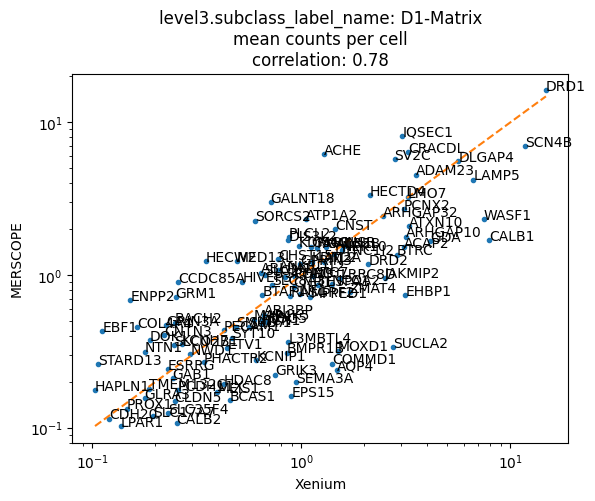

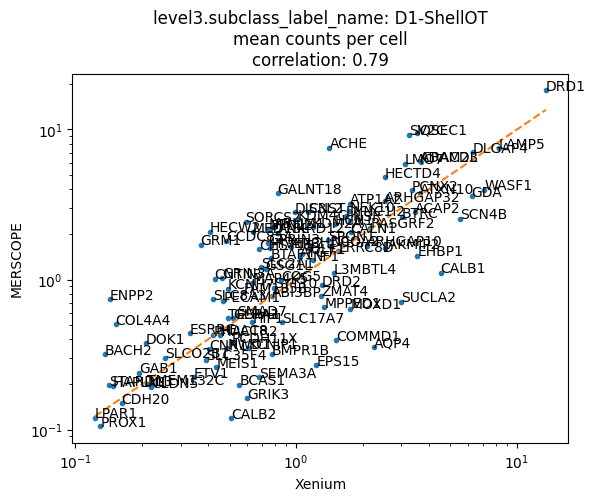

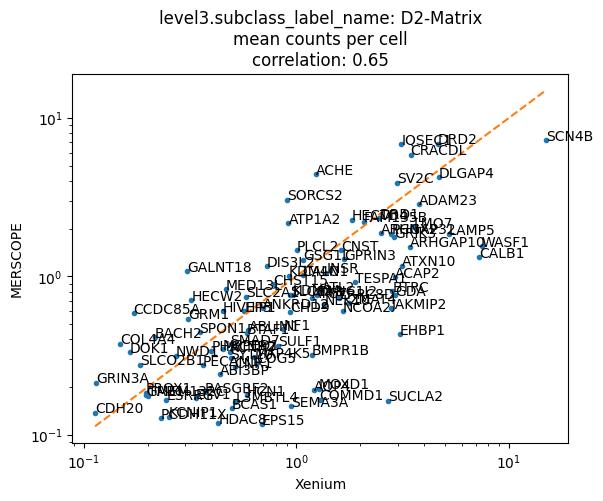

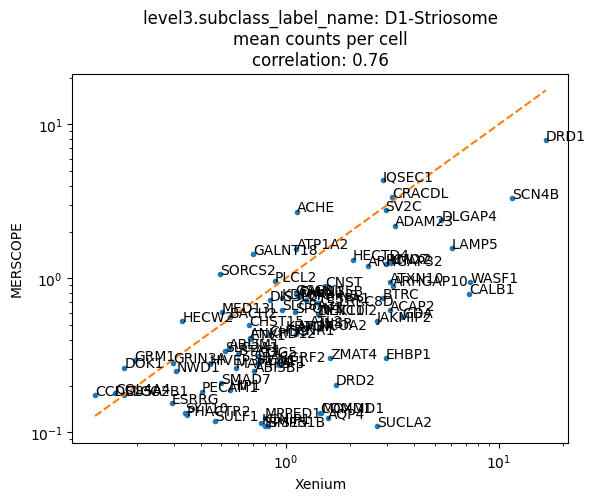

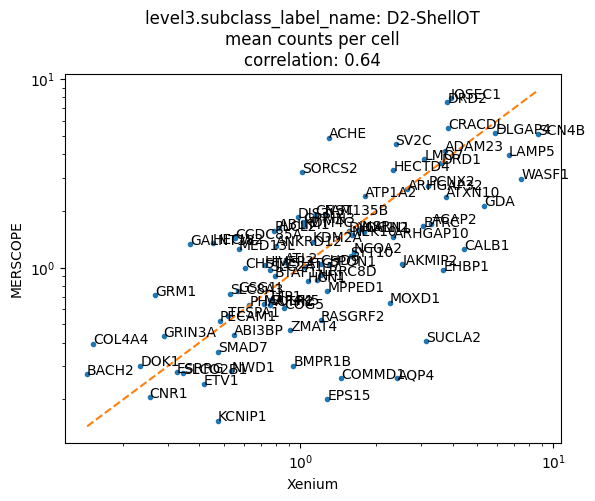

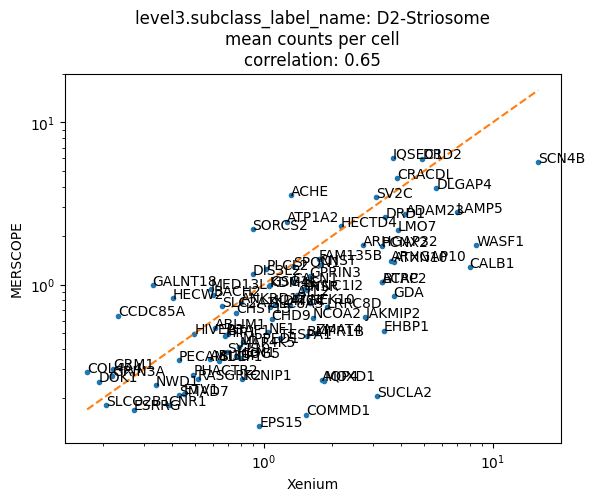

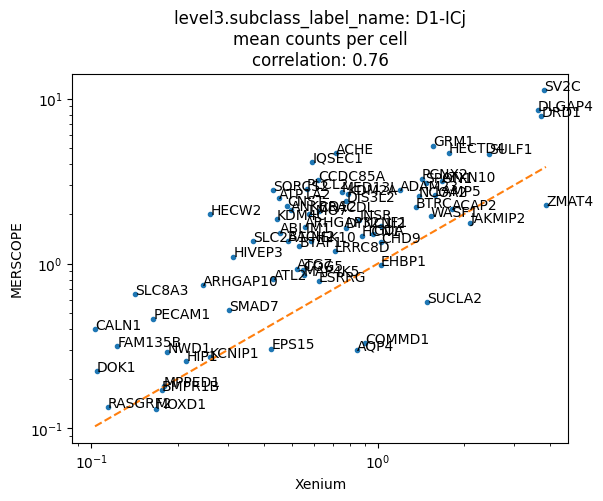

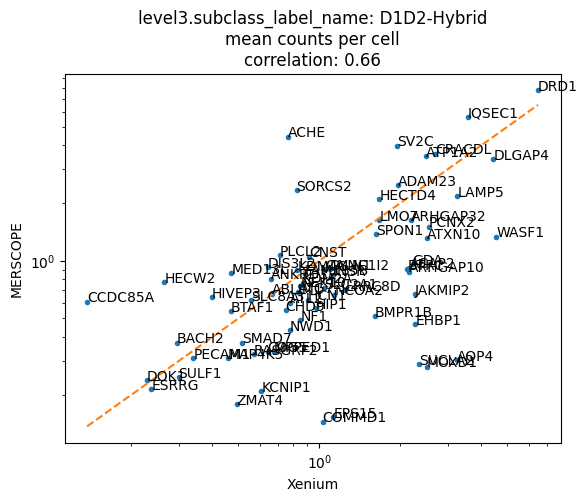

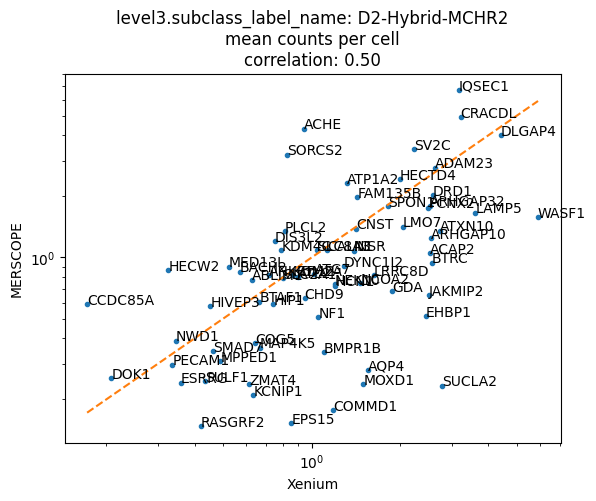

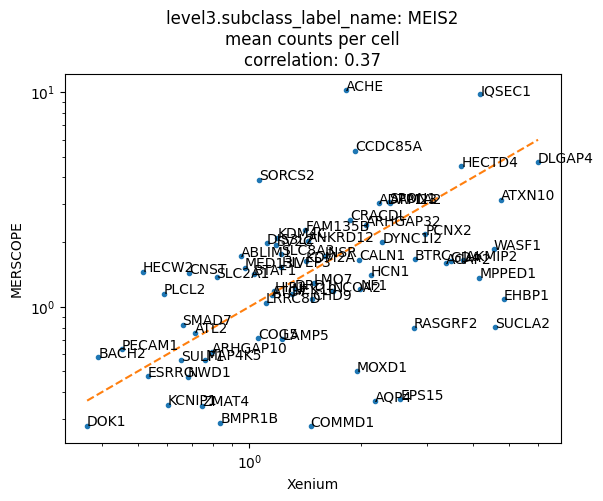

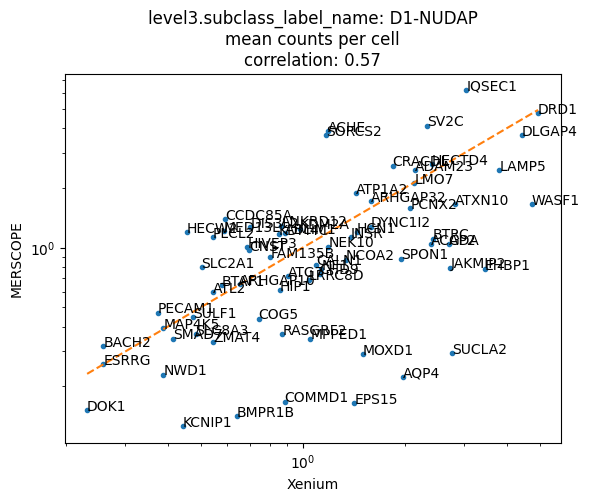

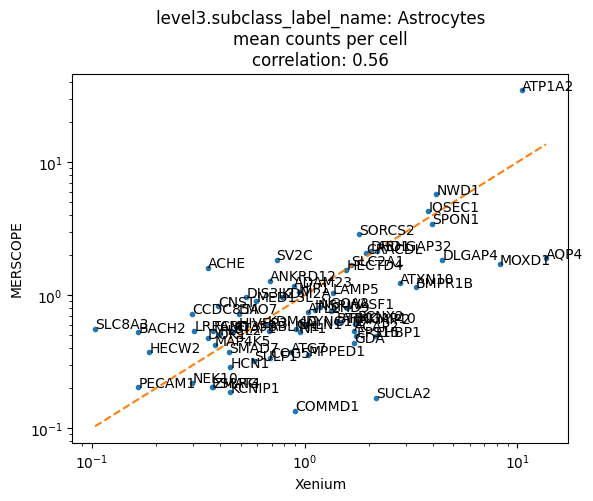

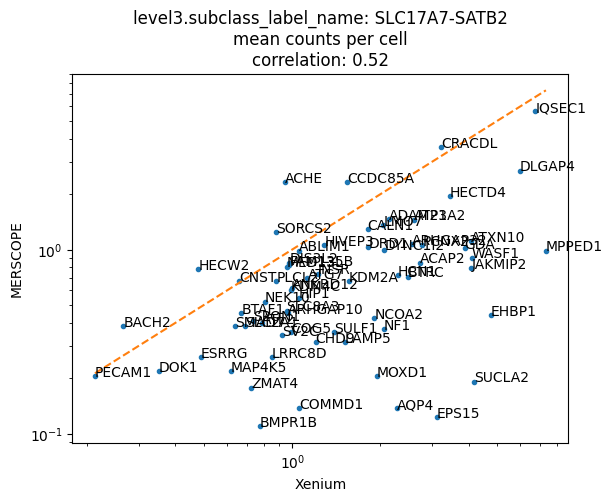

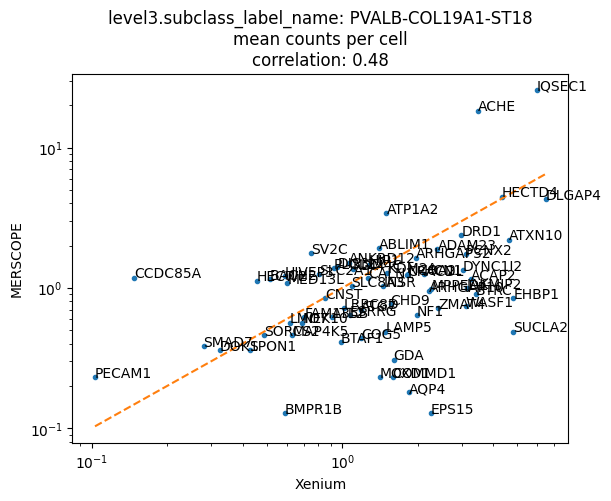

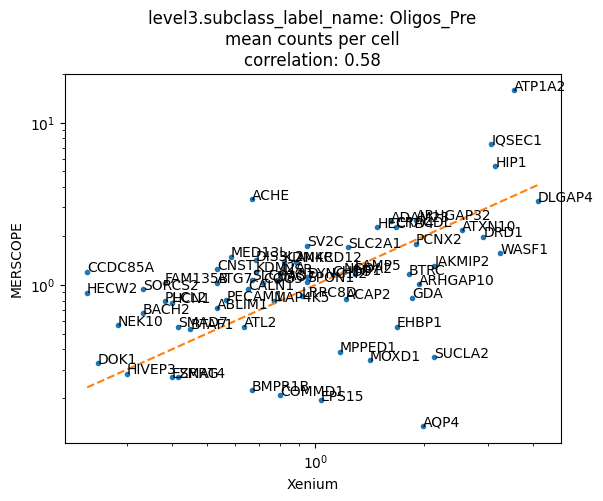

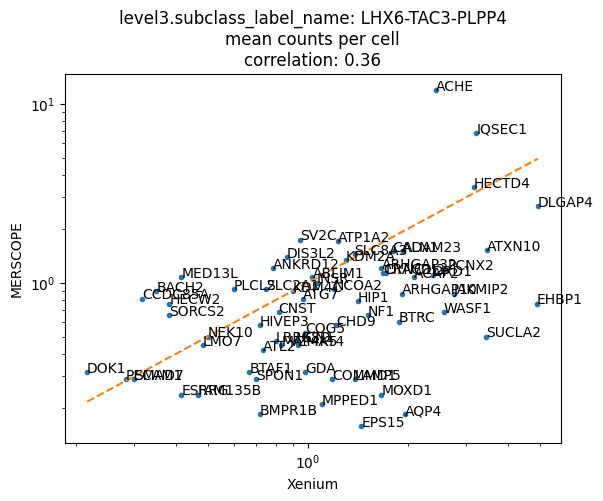

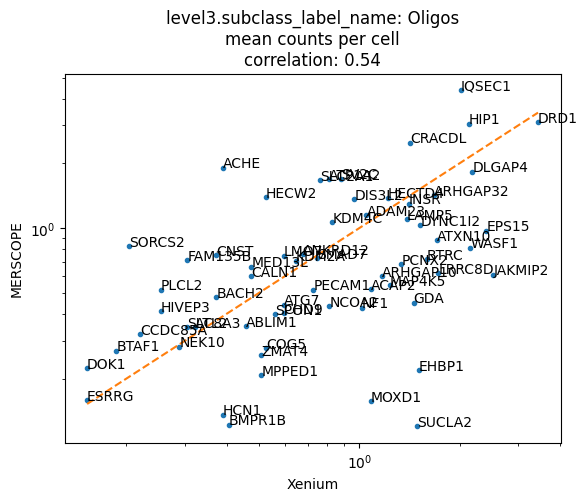

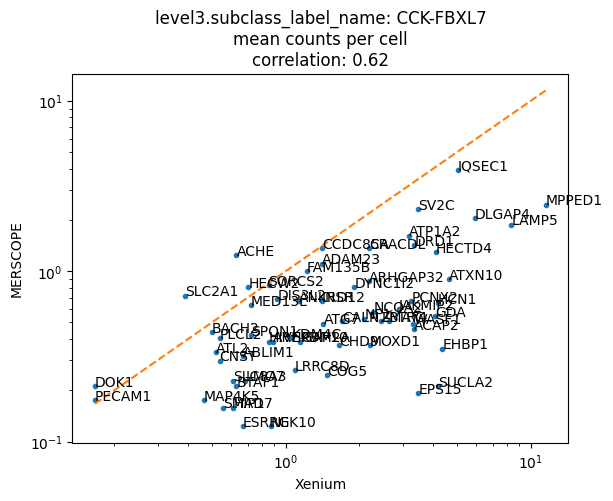

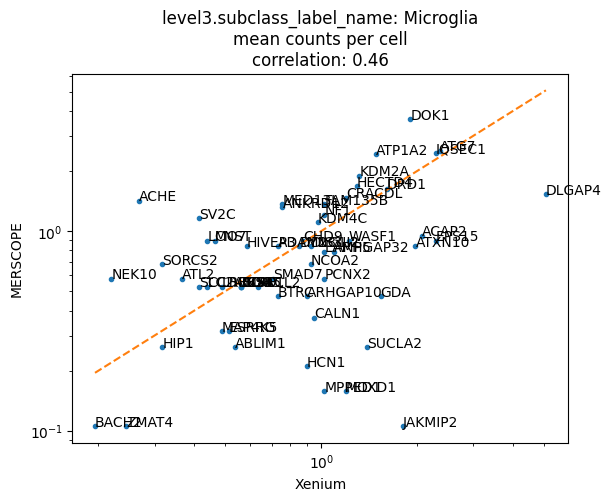

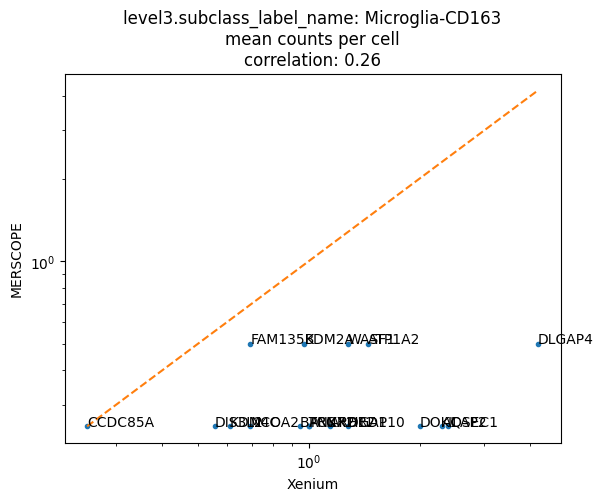

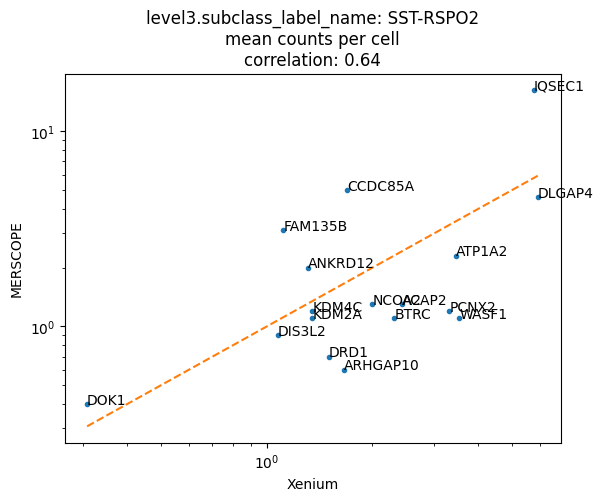

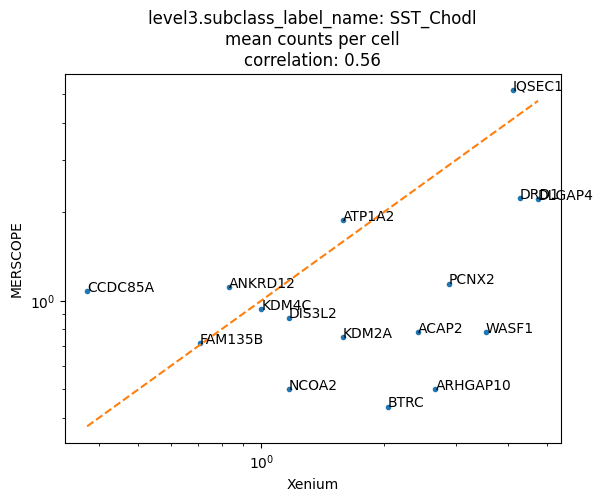

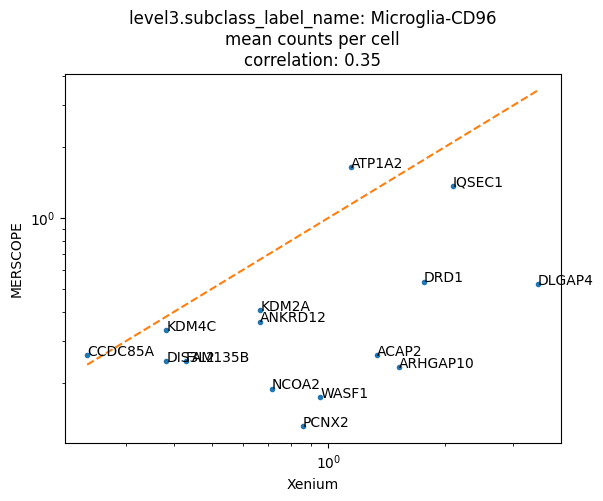

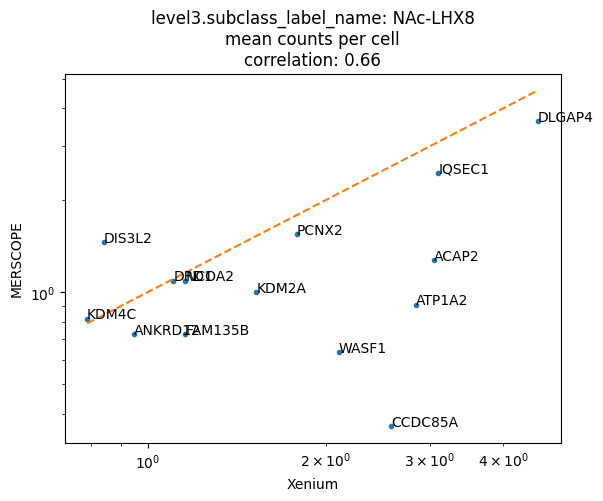

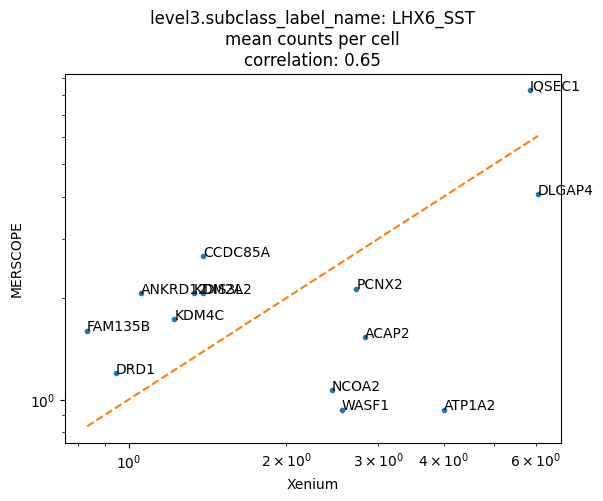

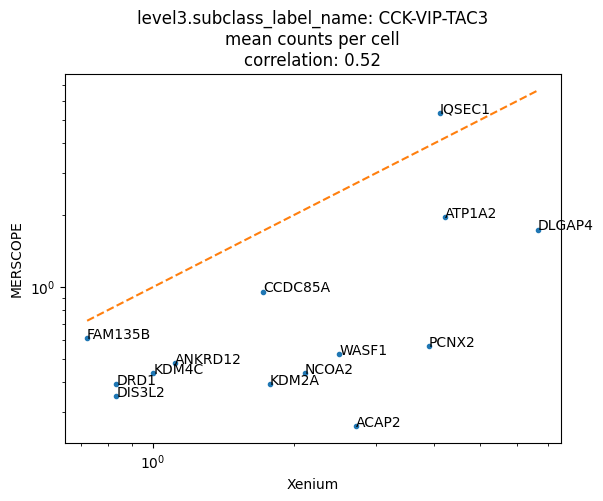

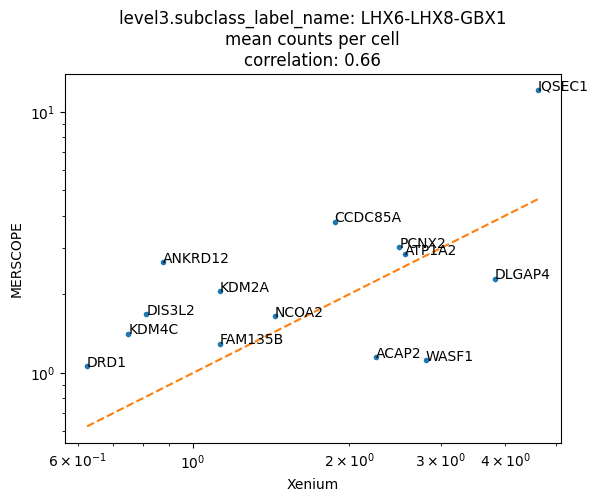

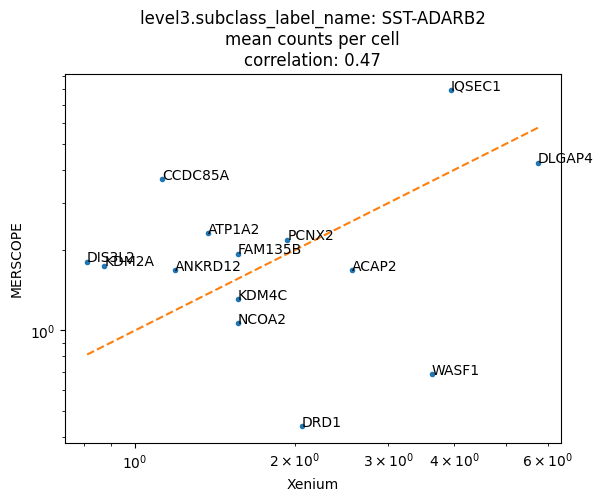

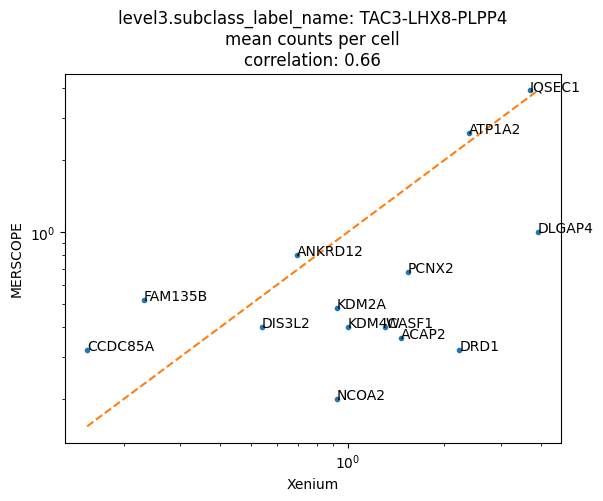

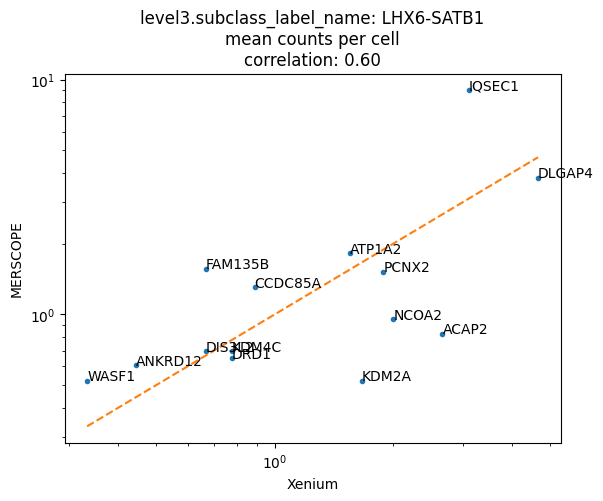

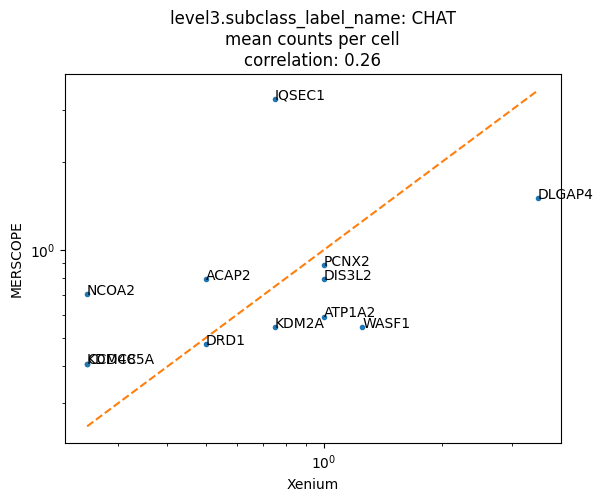

In [57]:
all_compare_results={}
for ii,match in enumerate(max_match):
    if ii!=3:
        continue
    all_compare_results={}
    print(match)
    msn_mask_0 = ad0.obs.supercluster_name == "Medium spiny neuron"
    msn_mask_1 = ad1.obs.supercluster_name == "Medium spiny neuron"

    a = spatial_compare(ad0[np.logical_and(ad0.obs.filename==match[0],msn_mask_0),:],
                ad1[np.logical_and(ad1.obs.filename==match[1],msn_mask_1),:],
                        data_names=["Xenium", "MERSCOPE"],
                        min_mean_expression=0.1,
        category = "level3.subclass_label_name", plot_stuff=True, spatial_plot=True)
    all_compare_results[match[0]]= a
    
    

['output-XETG00210__0004543__1336335389__20240327__182256', '1336335378']
167


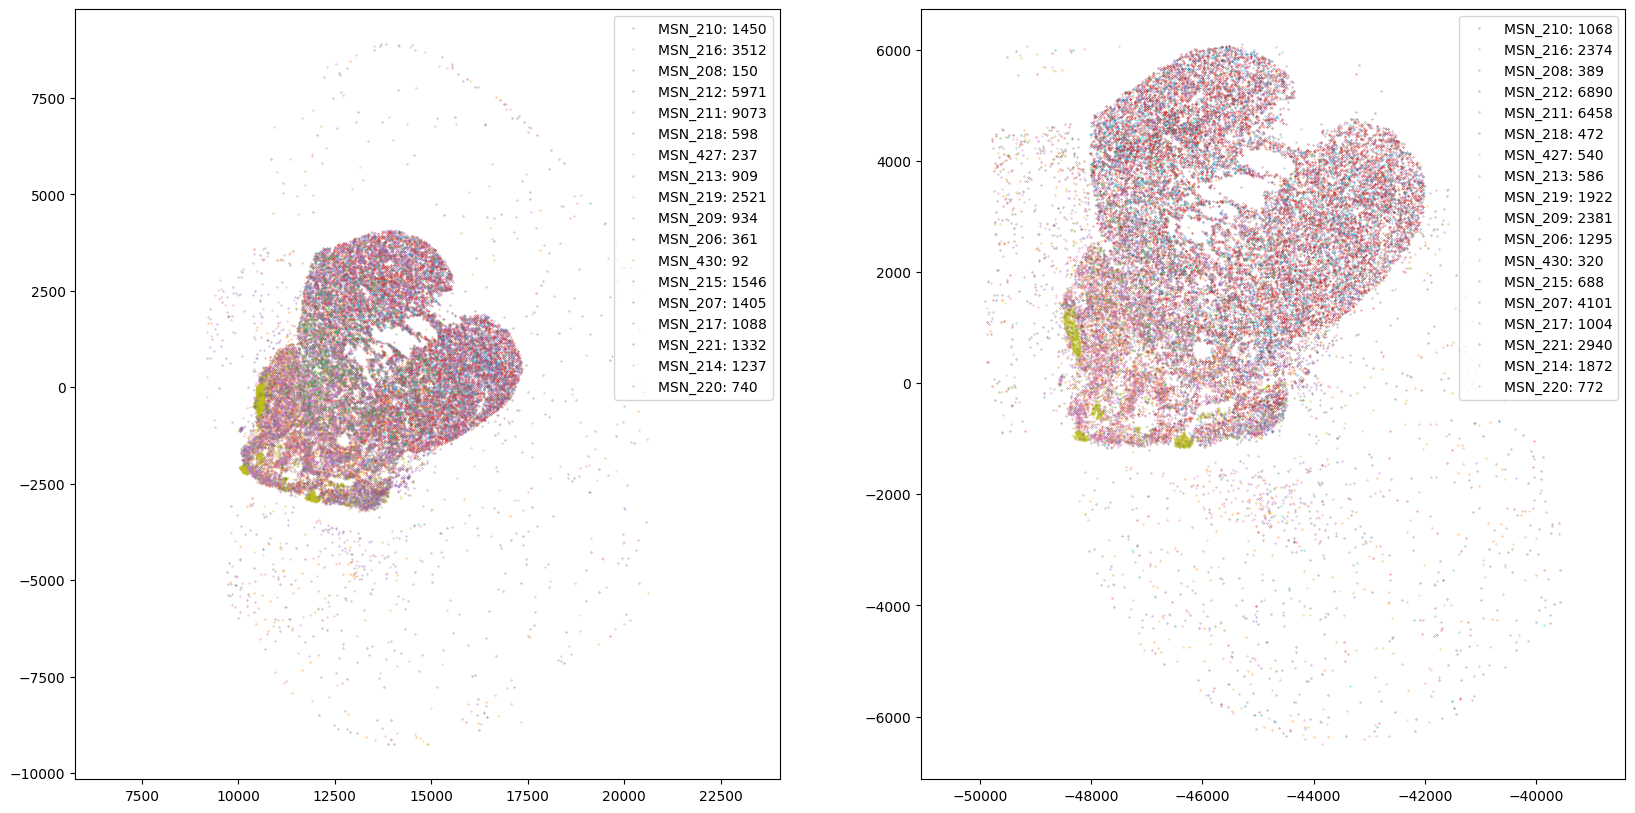

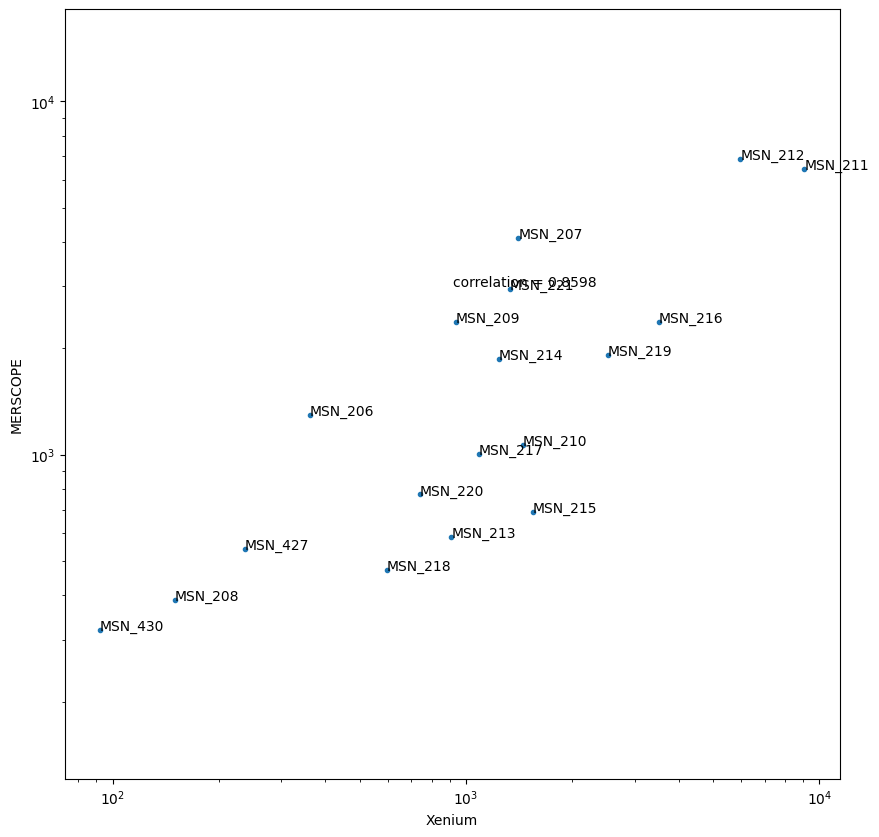

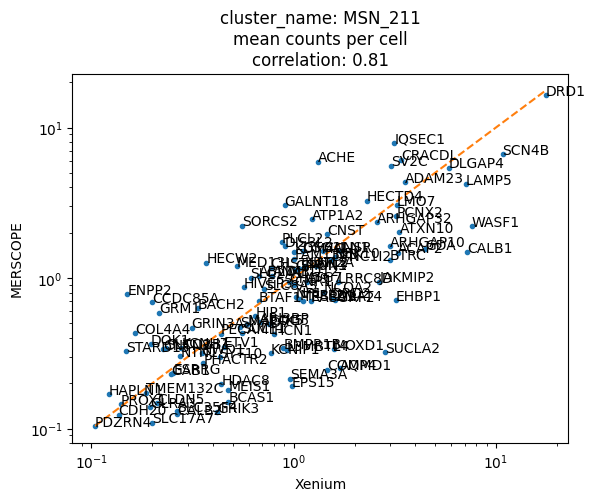

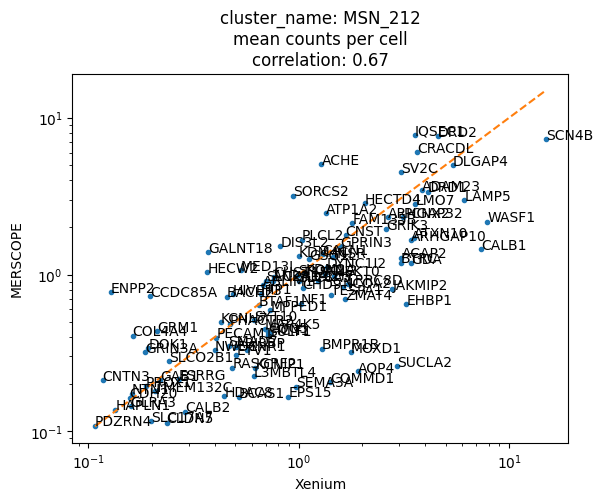

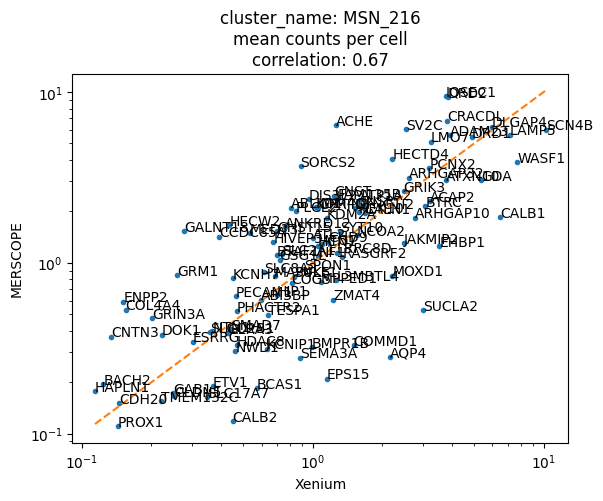

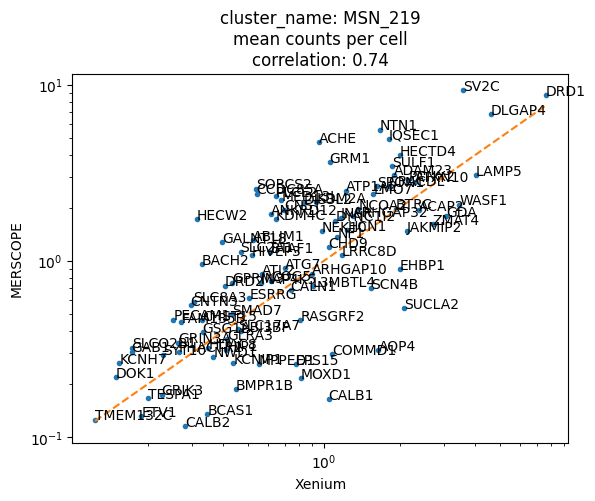

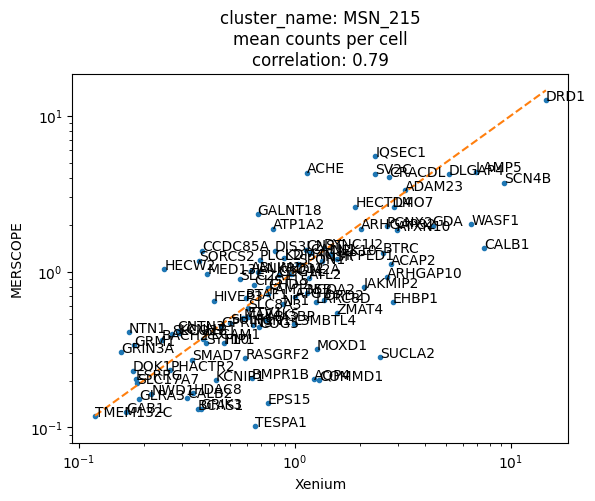

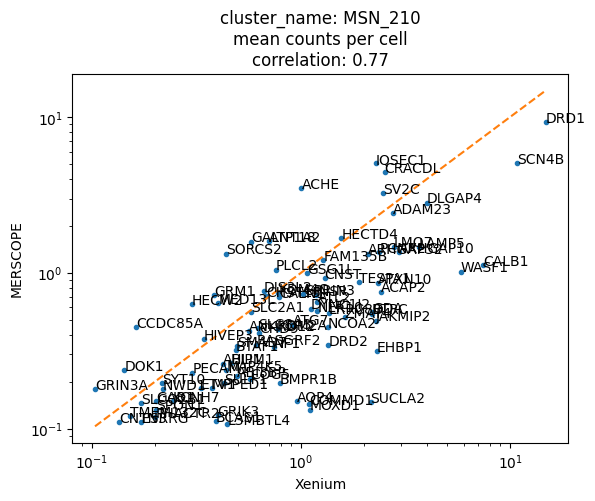

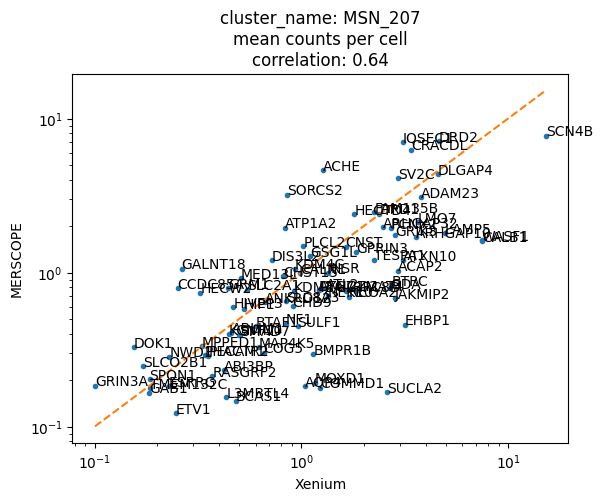

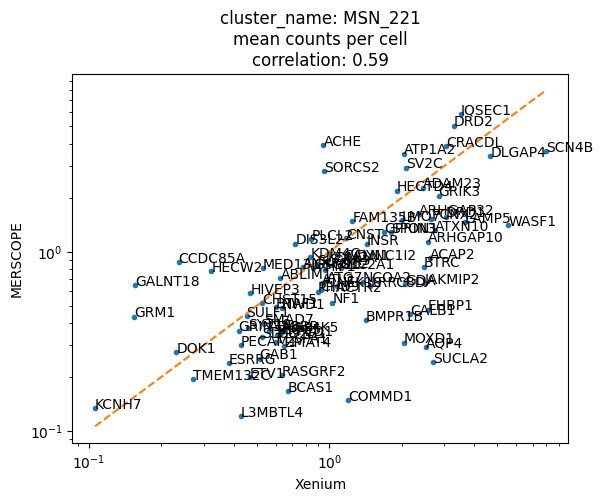

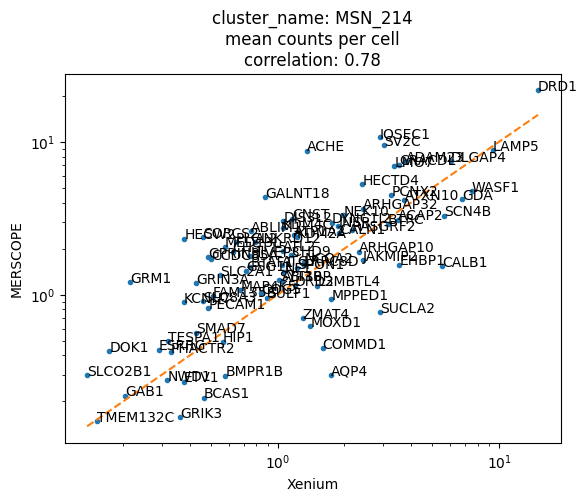

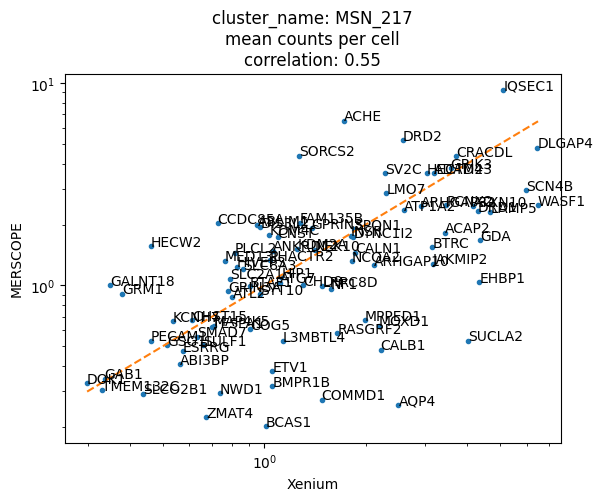

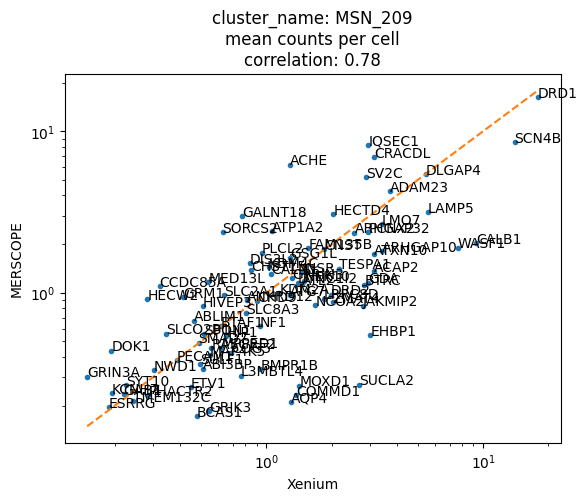

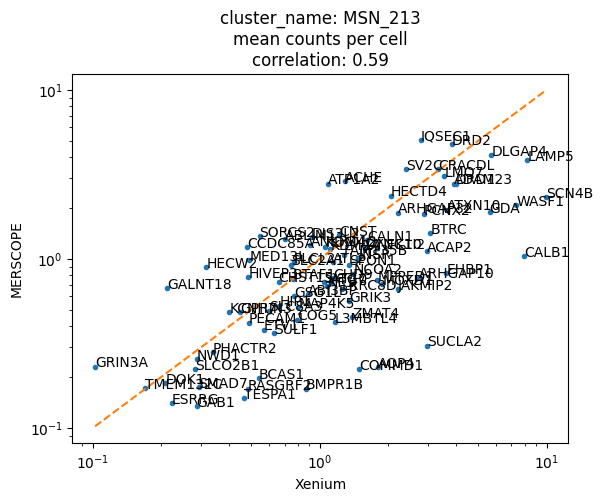

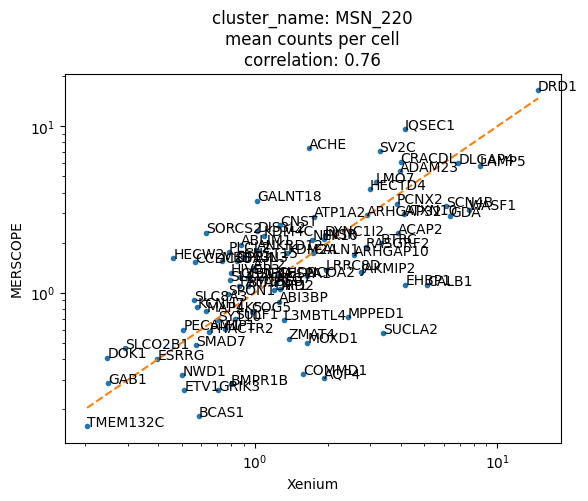

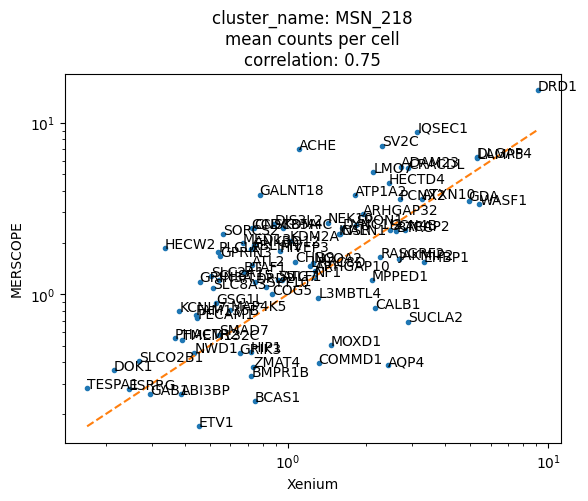

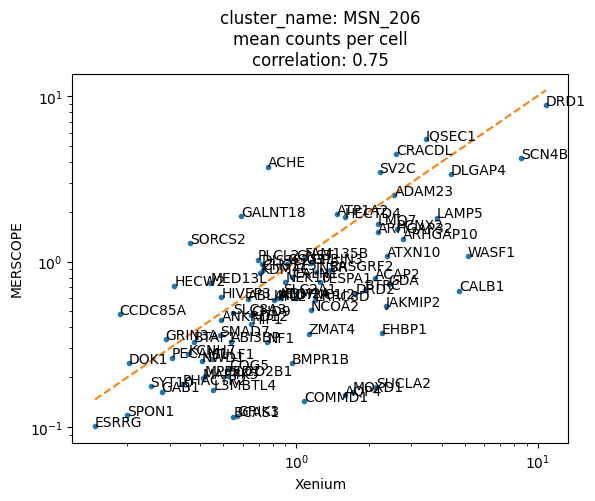

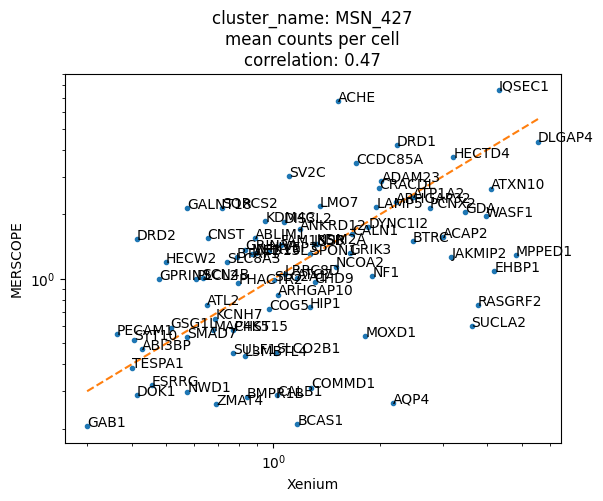

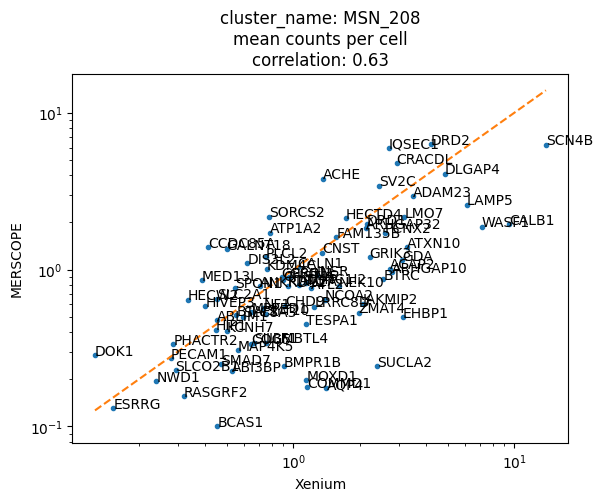

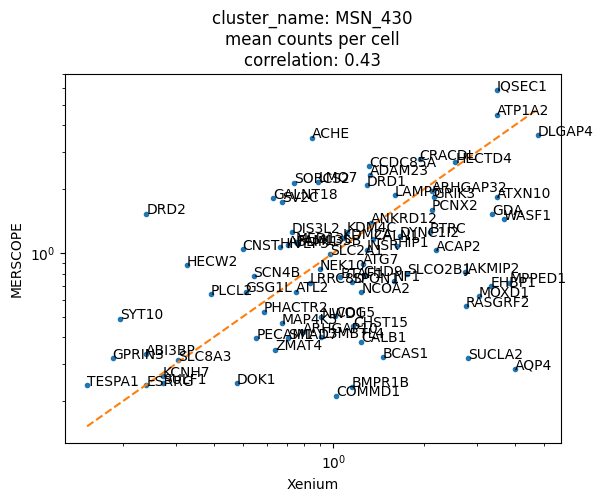

In [58]:
all_compare_results={}
for ii,match in enumerate(max_match):
    if ii!=3:
        continue
    all_compare_results={}
    print(match)
    msn_mask_0 = ad0.obs.supercluster_name == "Medium spiny neuron"
    msn_mask_1 = ad1.obs.supercluster_name == "Medium spiny neuron"

    a = spatial_compare(ad0[np.logical_and(ad0.obs.filename==match[0],msn_mask_0),:],
                ad1[np.logical_and(ad1.obs.filename==match[1],msn_mask_1),:],
                        data_names=["Xenium", "MERSCOPE"],
                        min_mean_expression=0.1,
        category = "cluster_name", plot_stuff=True, spatial_plot=True)
    all_compare_results[match[0]]= a
    
    

In [23]:
ad0.obs.columns

Index(['cell_id', 'cell_id_x', 'x_centroid', 'y_centroid', 'transcript_counts',
       'control_probe_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'filename', 'cell_id_y',
       'supercluster_label', 'supercluster_name',
       'supercluster_bootstrapping_probability', 'cluster_label',
       'cluster_name', 'cluster_bootstrapping_probability', 'subcluster_label',
       'subcluster_name', 'subcluster_alias',
       'subcluster_bootstrapping_probability'],
      dtype='object')

In [ ]:
all_compare_results={}
for ii,match in enumerate(max_match):
    if ii!=3:
        continue
    all_compare_results={}
    print(match)
    msn_mask_0 = ad0.obs.supercluster_name == "Medium spiny neuron"
    msn_mask_1 = ad1.obs.supercluster_name == "Medium spiny neuron"

    a = spatial_compare(ad0[np.logical_and(ad0.obs.filename==match[0],msn_mask_0),:],
                ad1[np.logical_and(ad1.obs.filename==match[1],msn_mask_1),:],
                        data_names=["Xenium", "MERSCOPE"],
                        min_mean_expression=0.1,
        category = "cluster_name", plot_stuff=True, spatial_plot=True)
    all_compare_results[match[0]]= a
    
    

/scratch/fast/15598417/ipykernel_40293/1811534627.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[12,10])


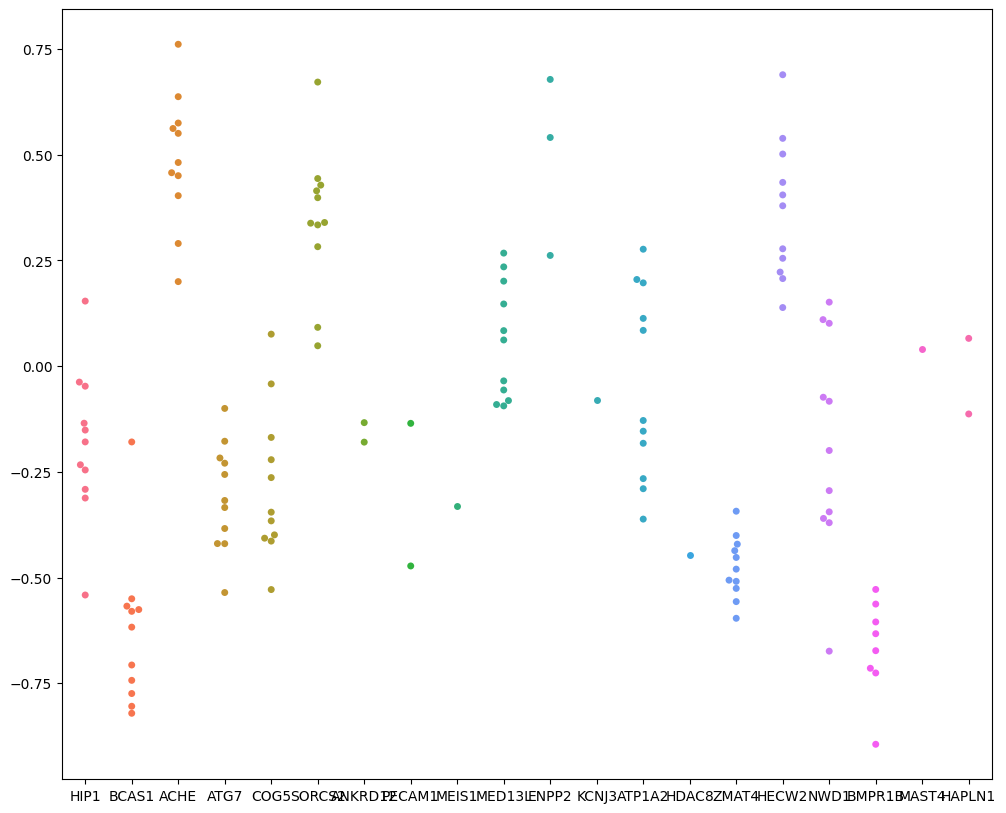

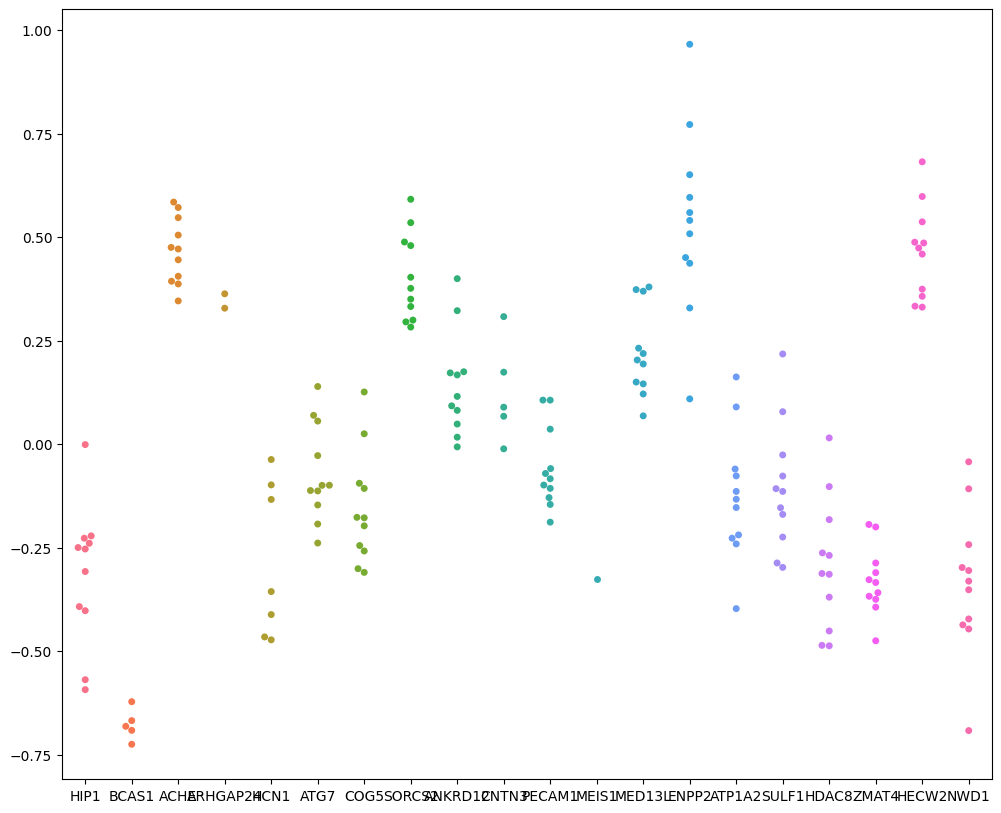

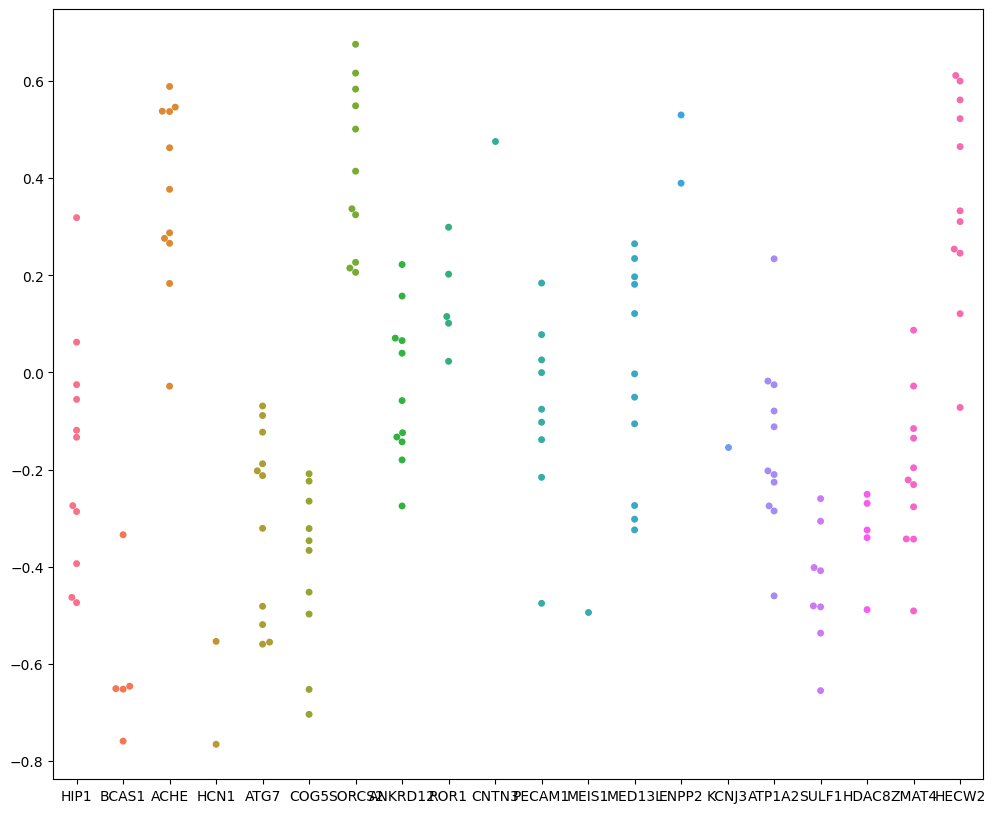

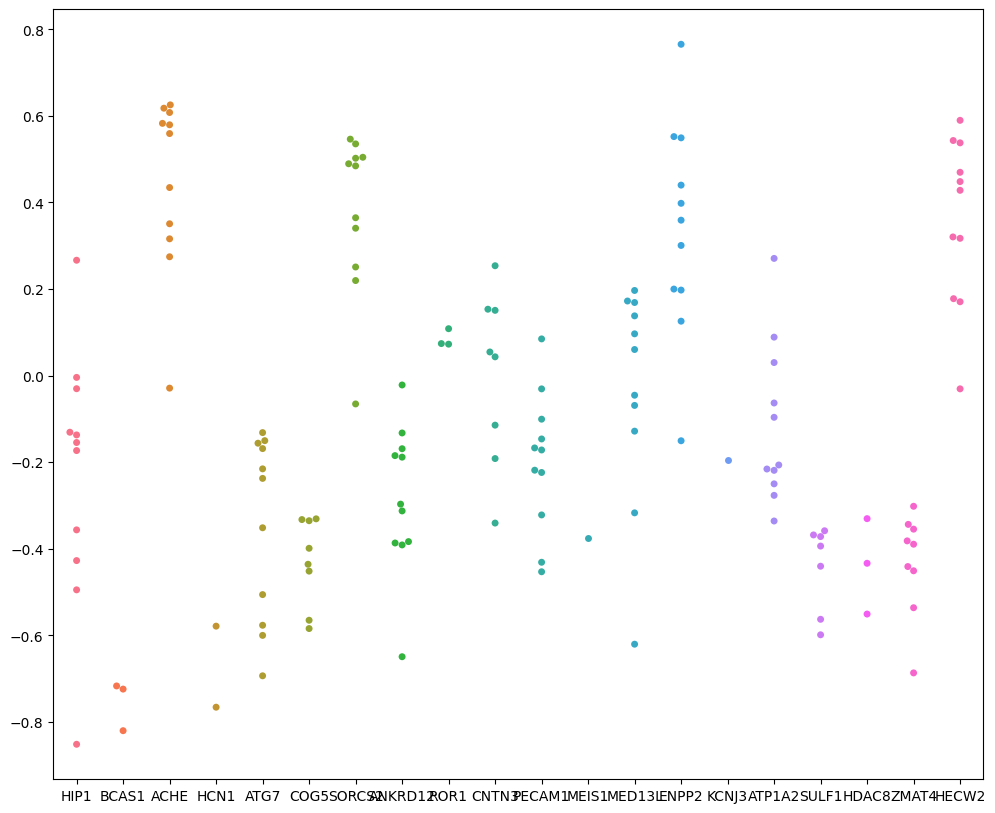

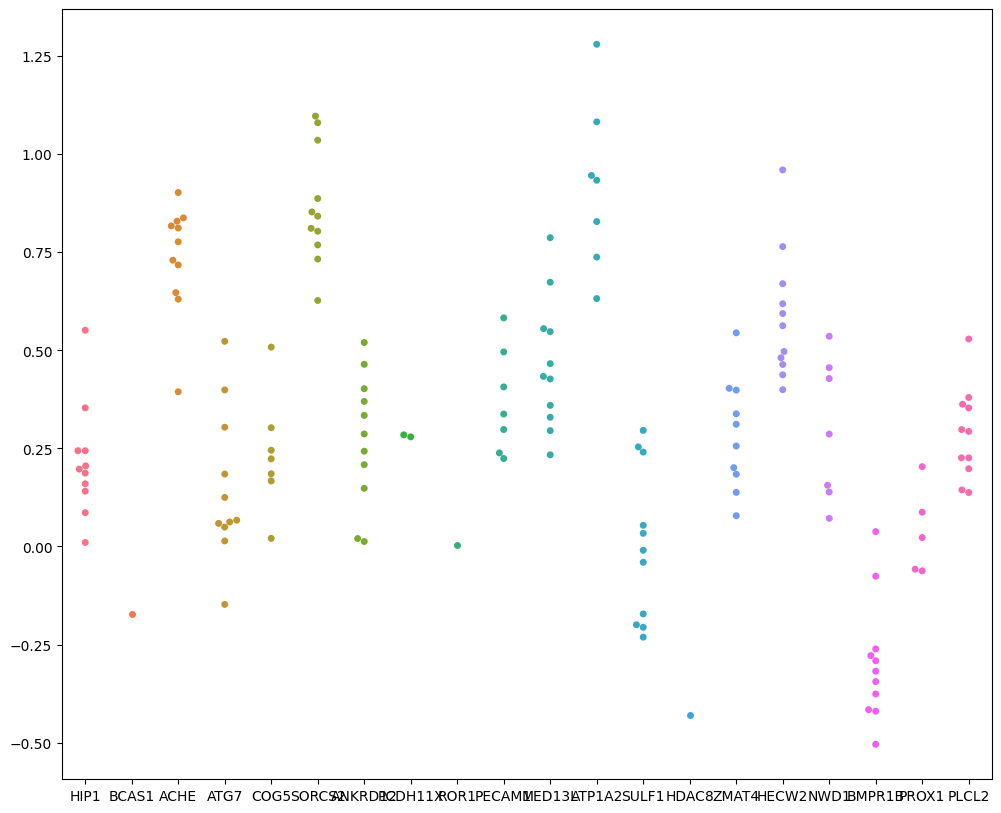

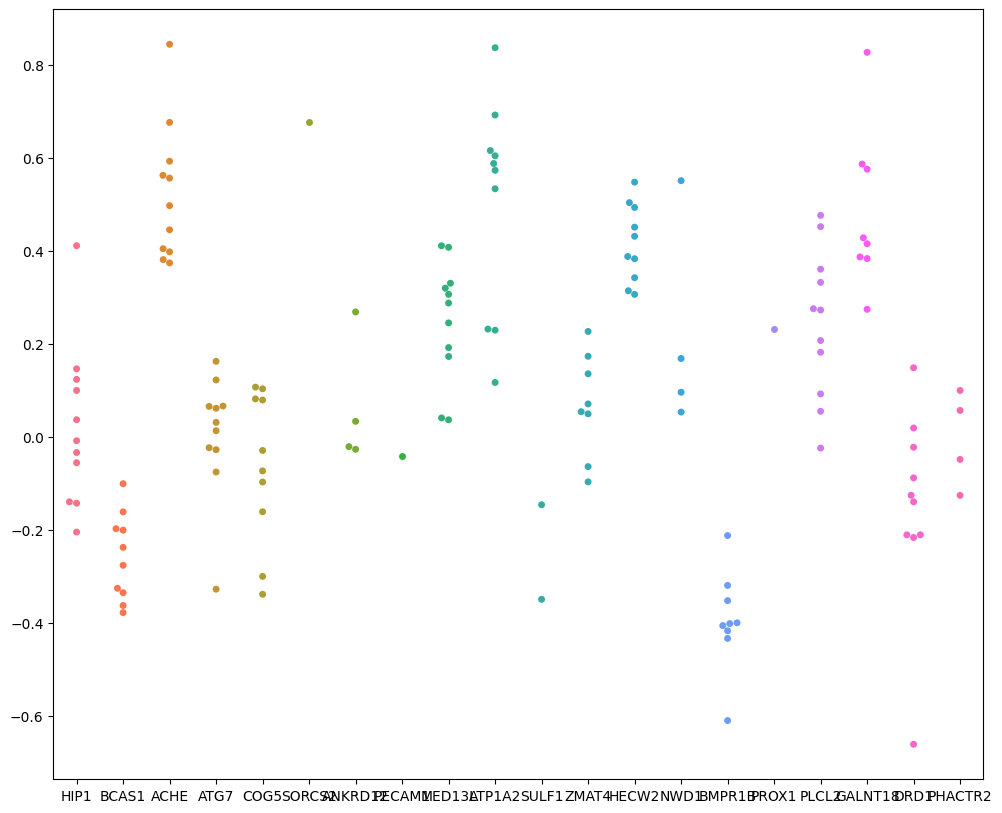

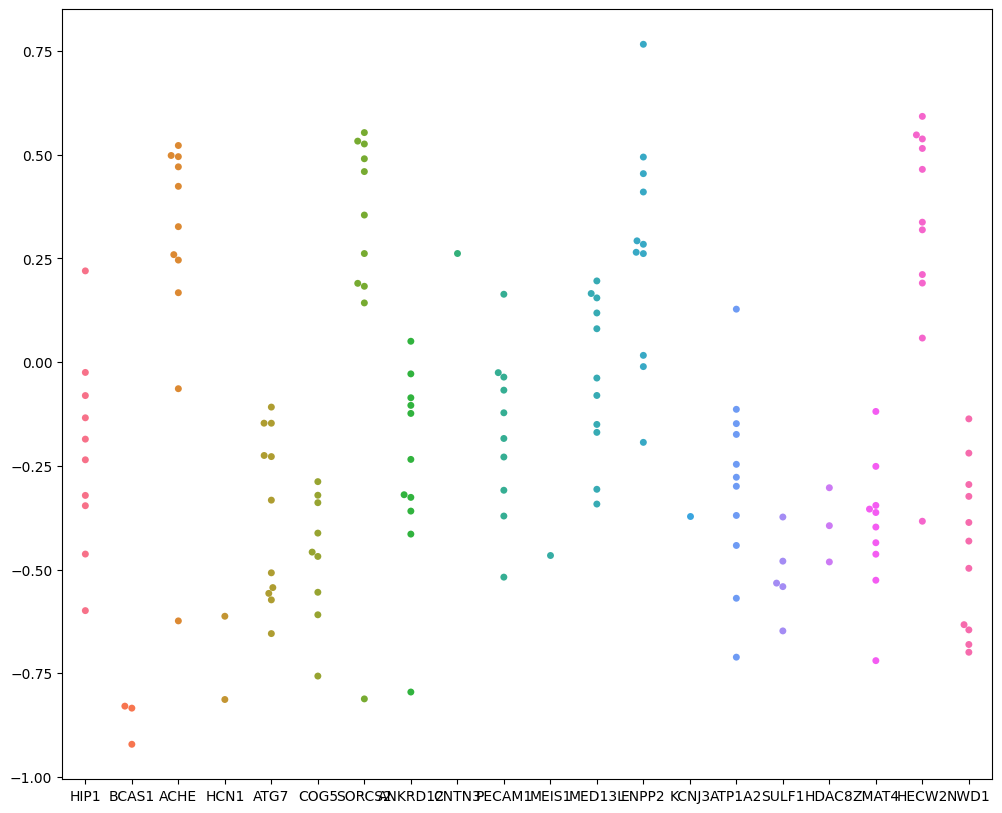

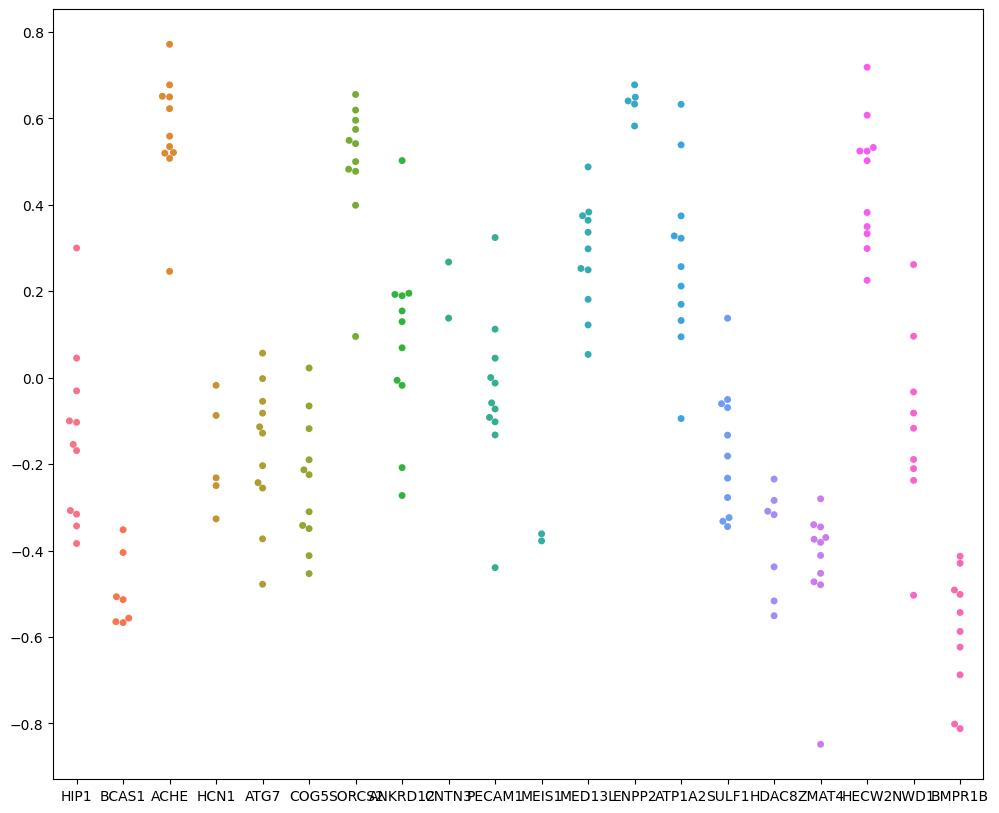

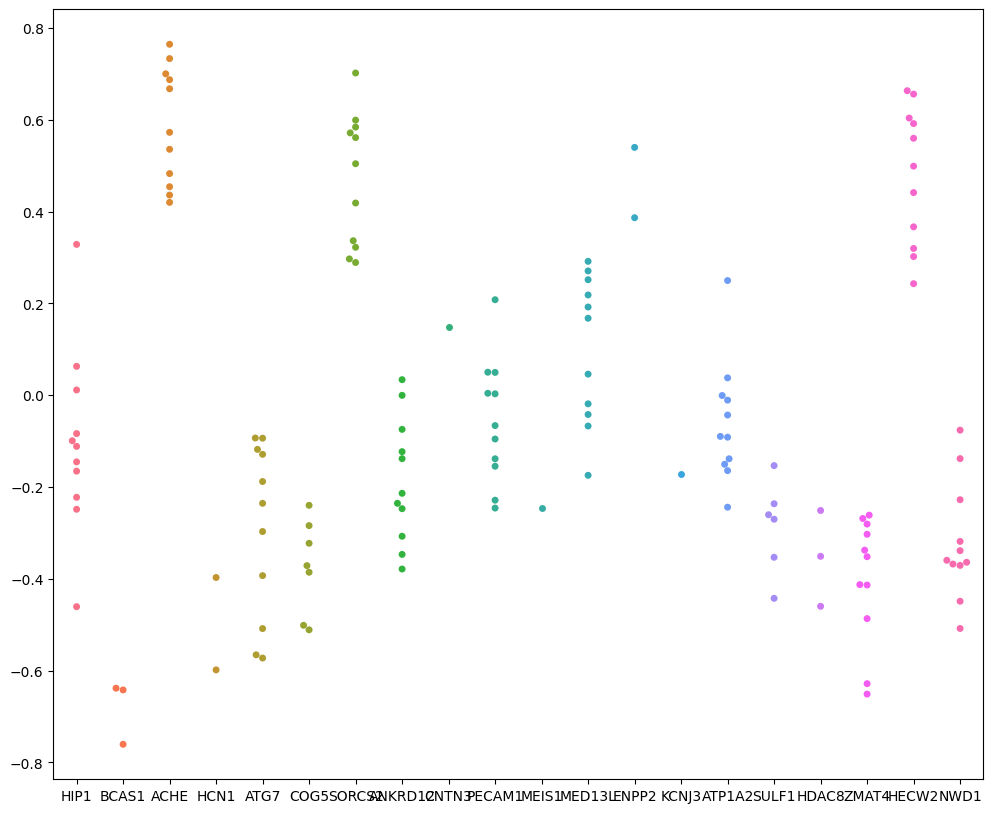

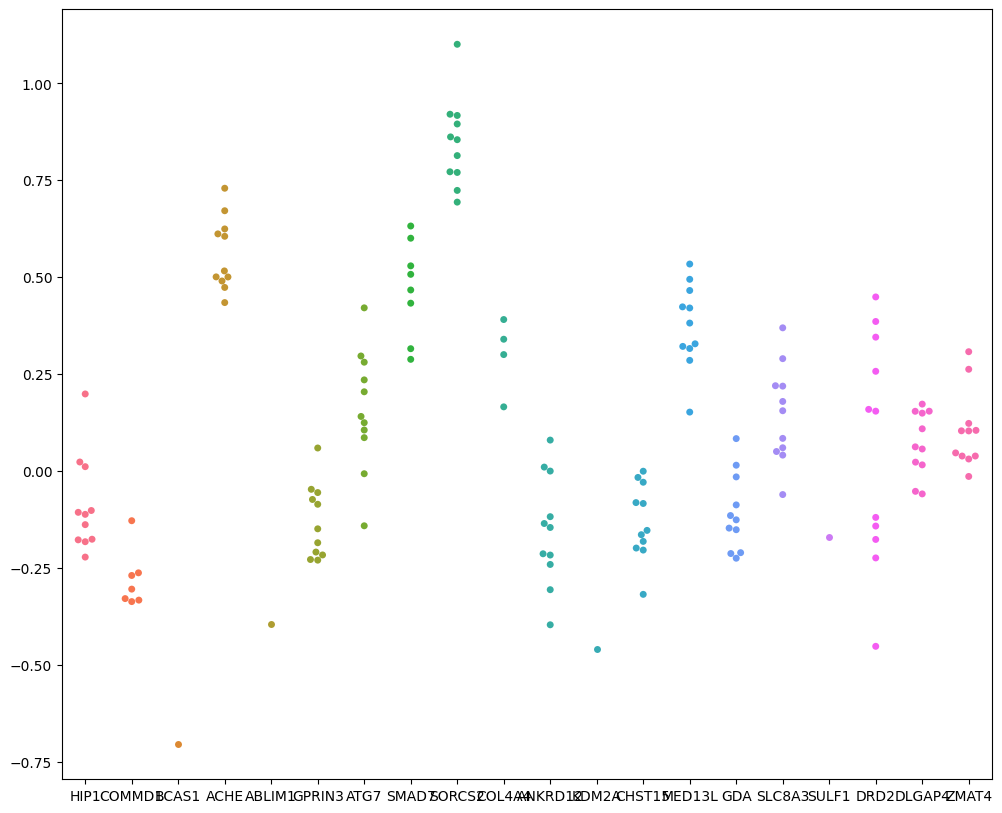

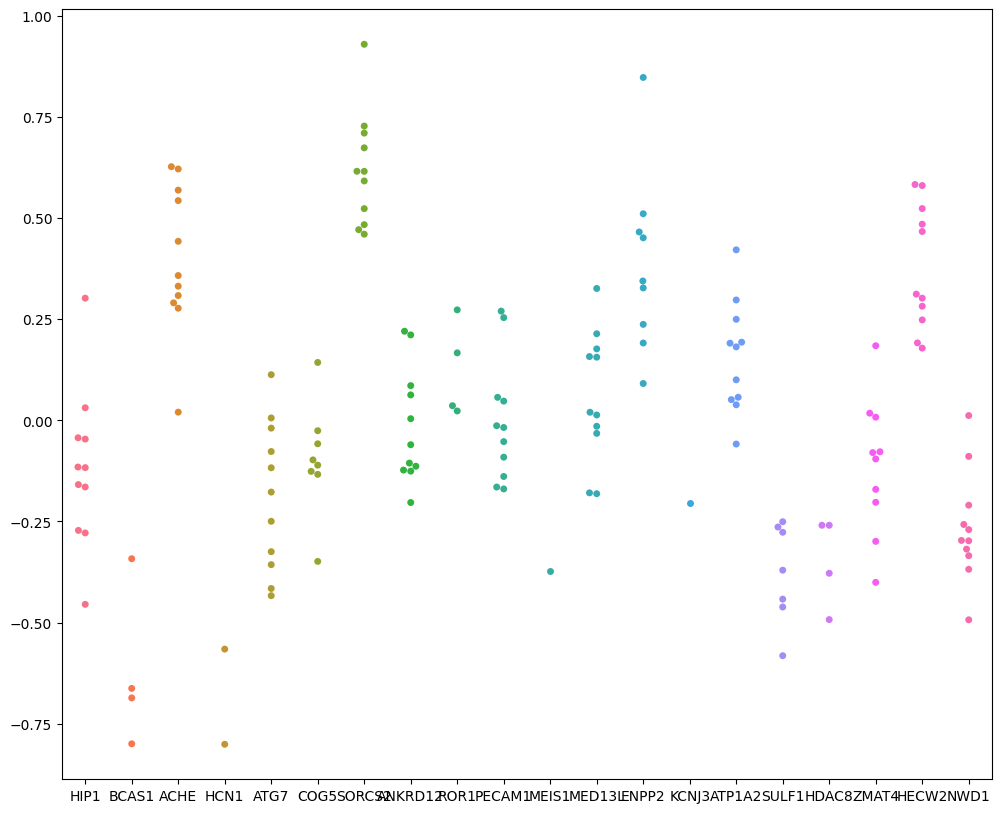

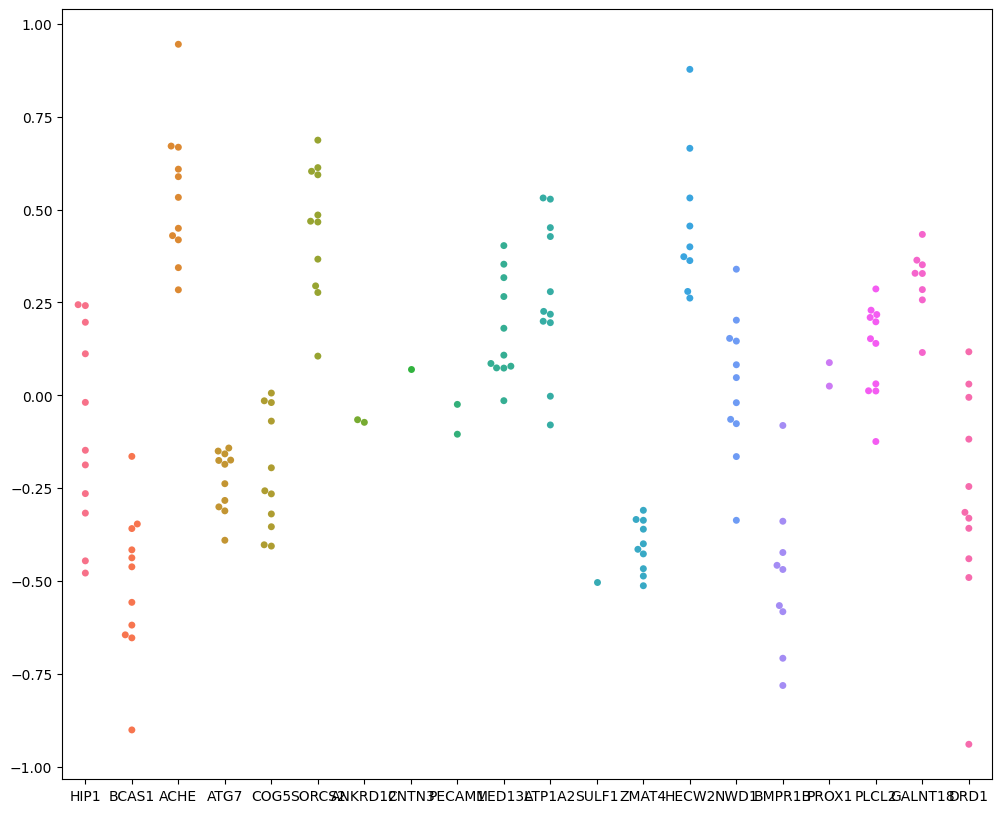

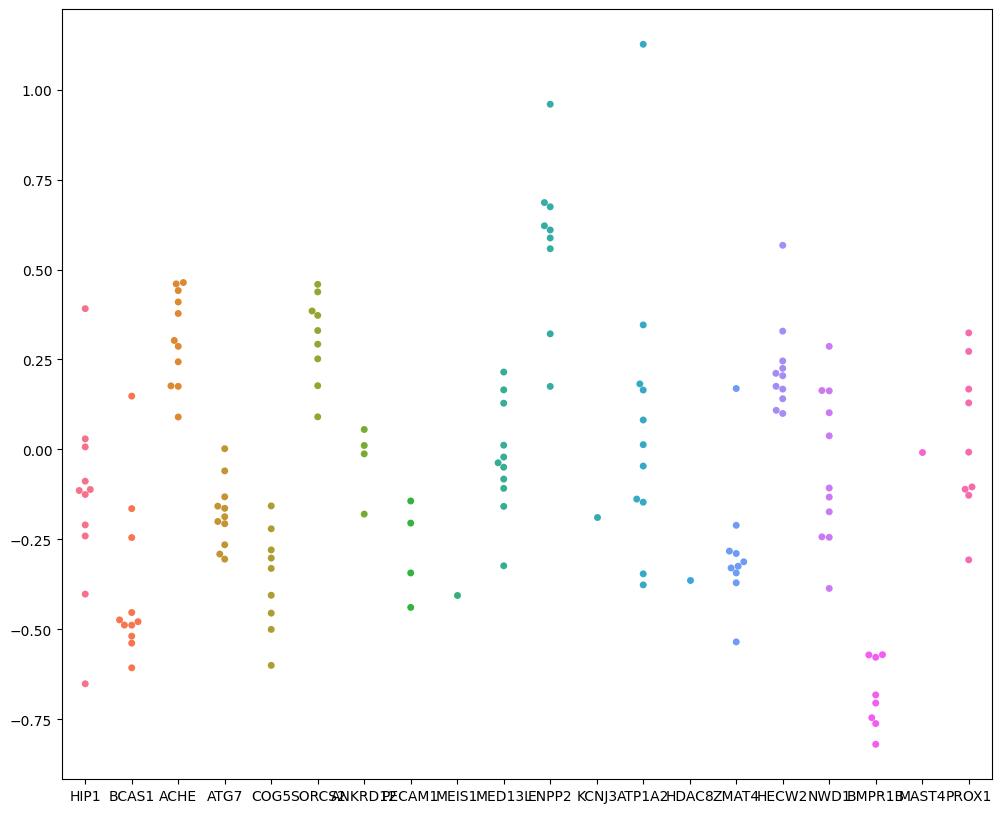

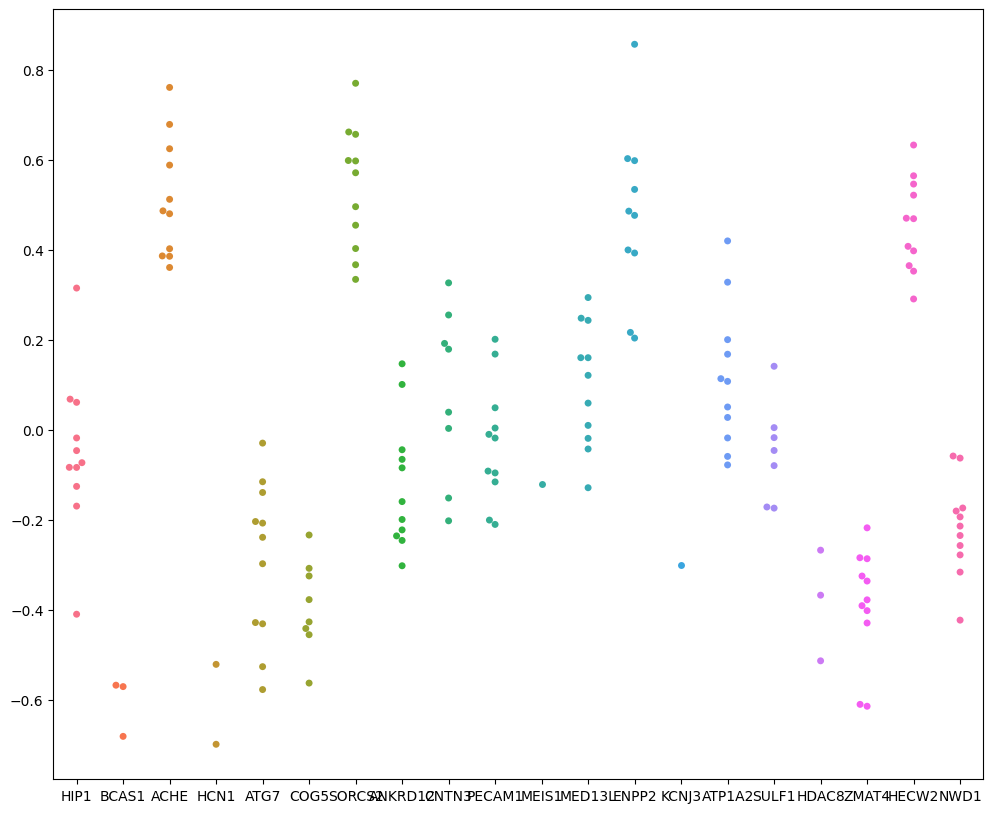

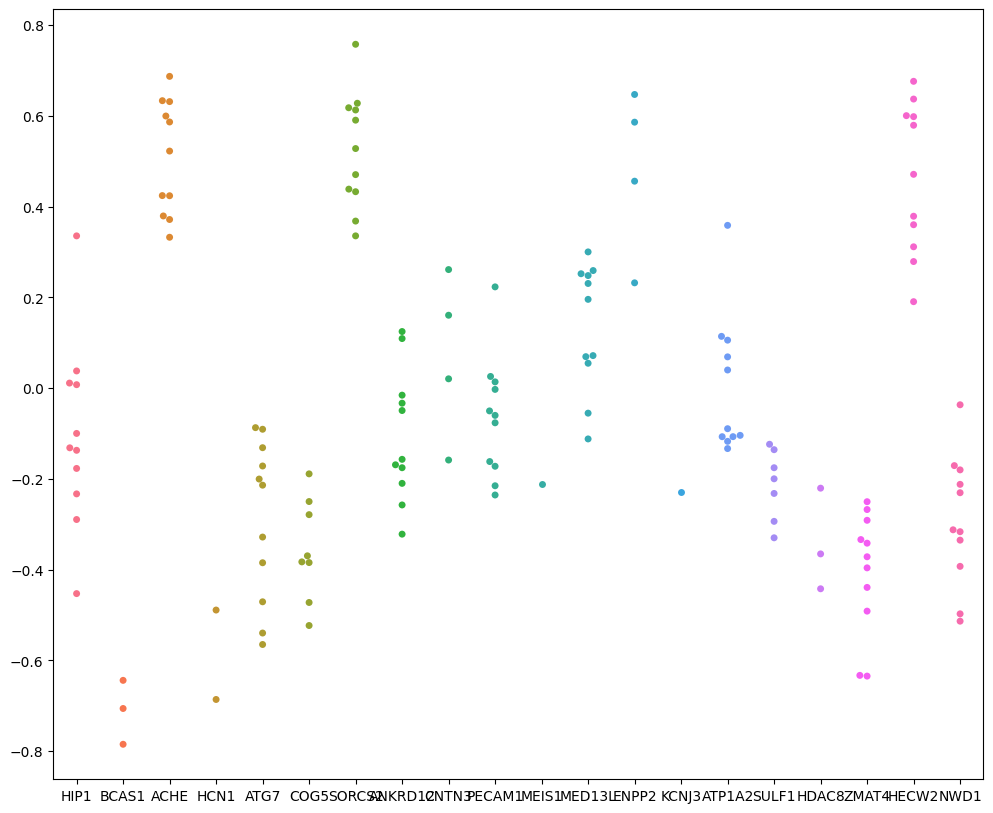

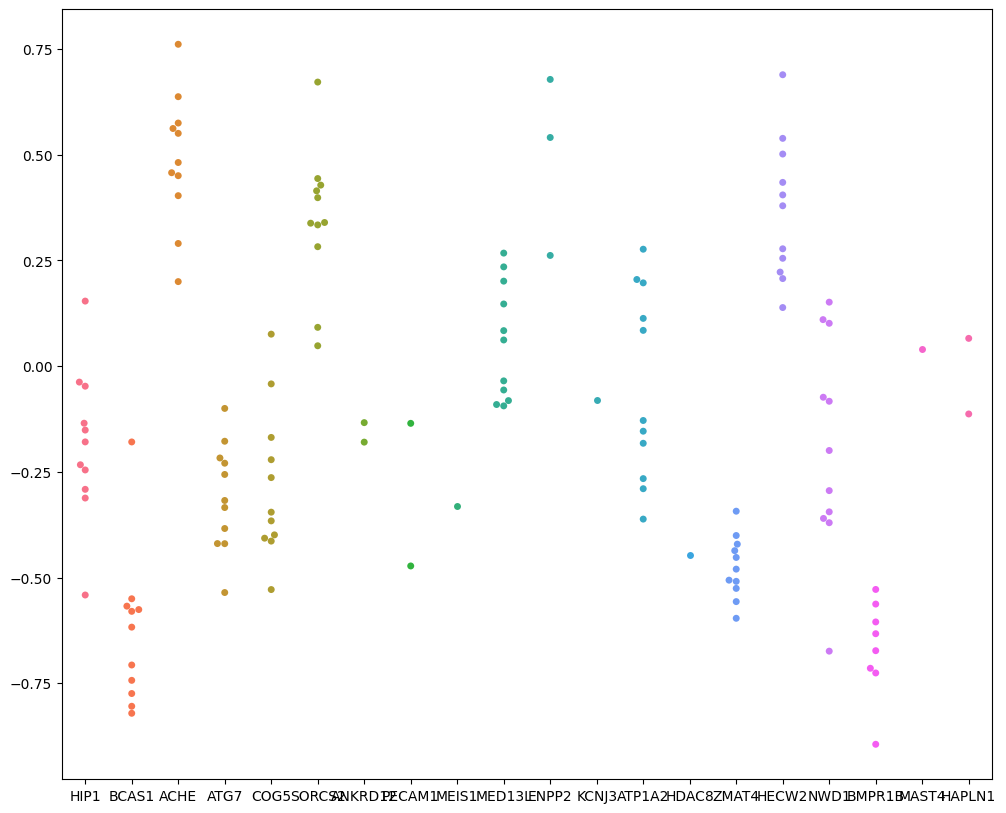

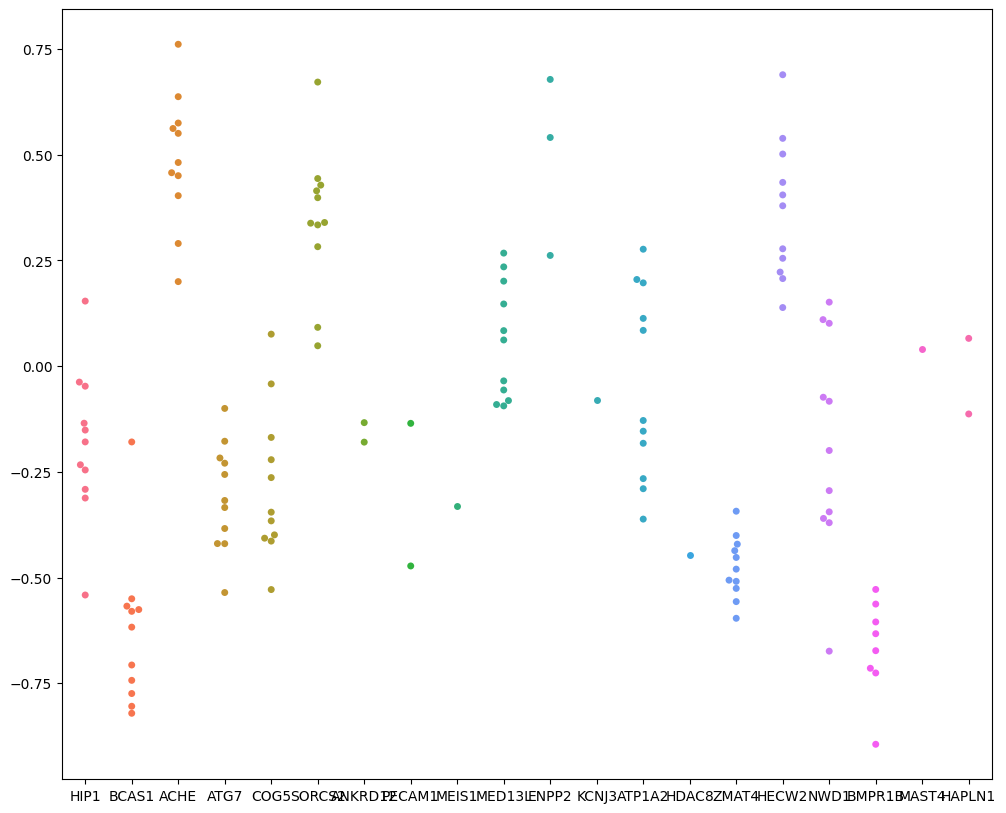

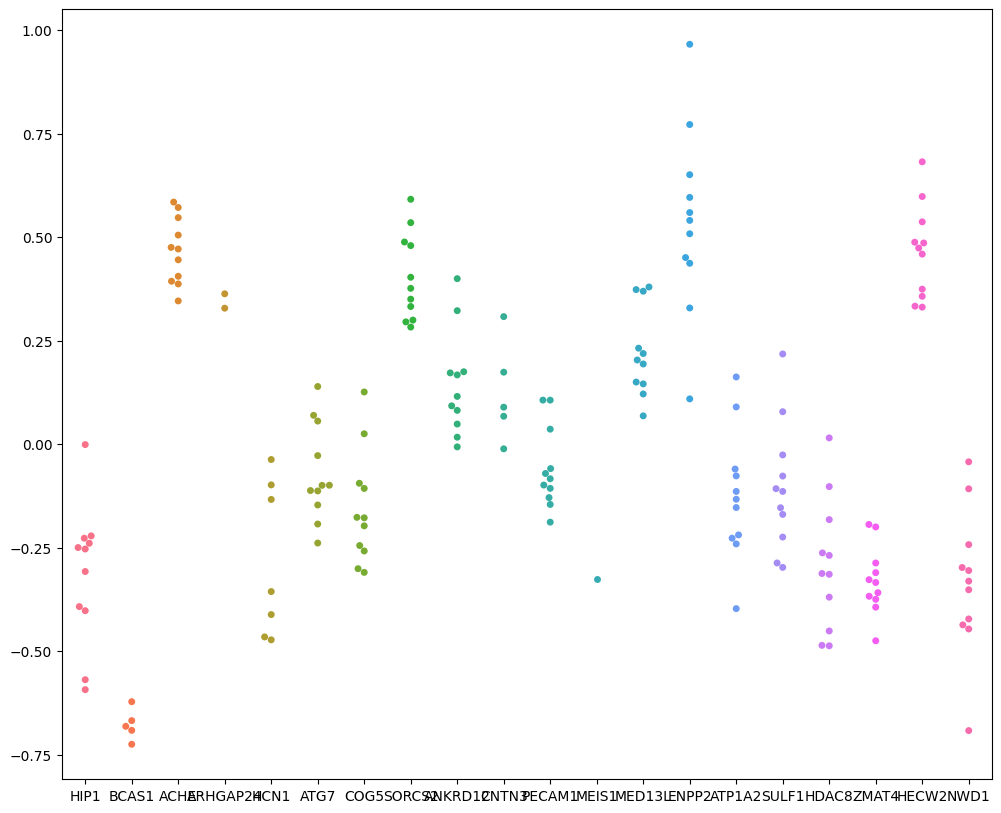

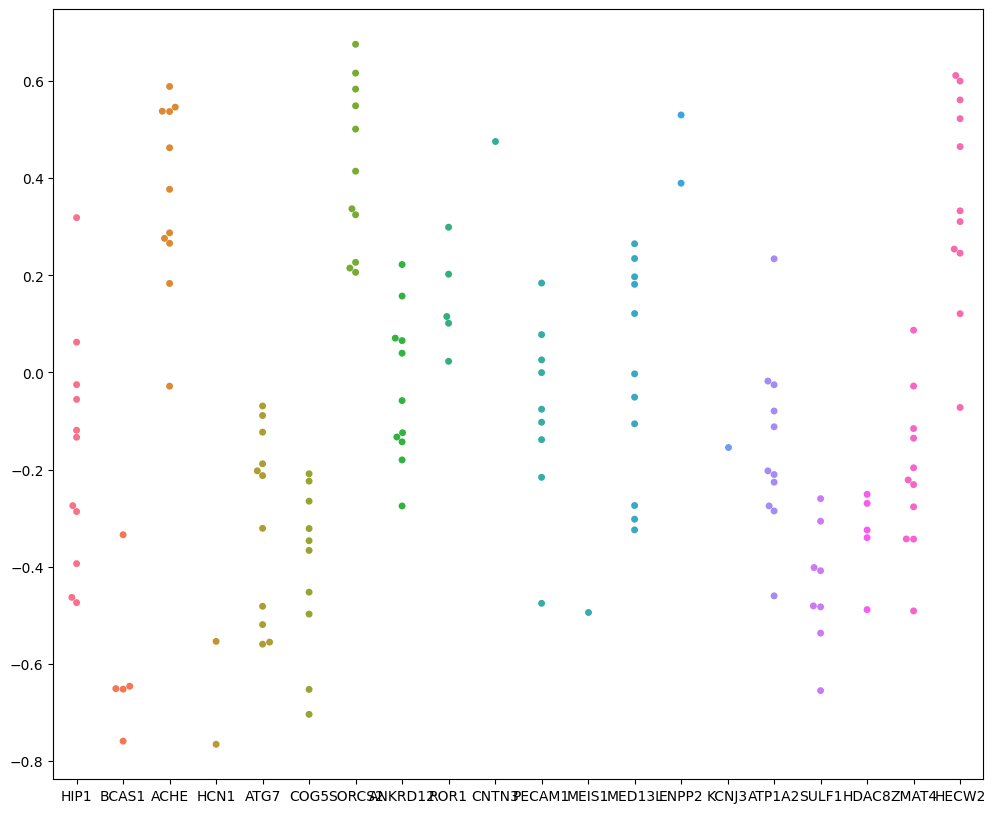

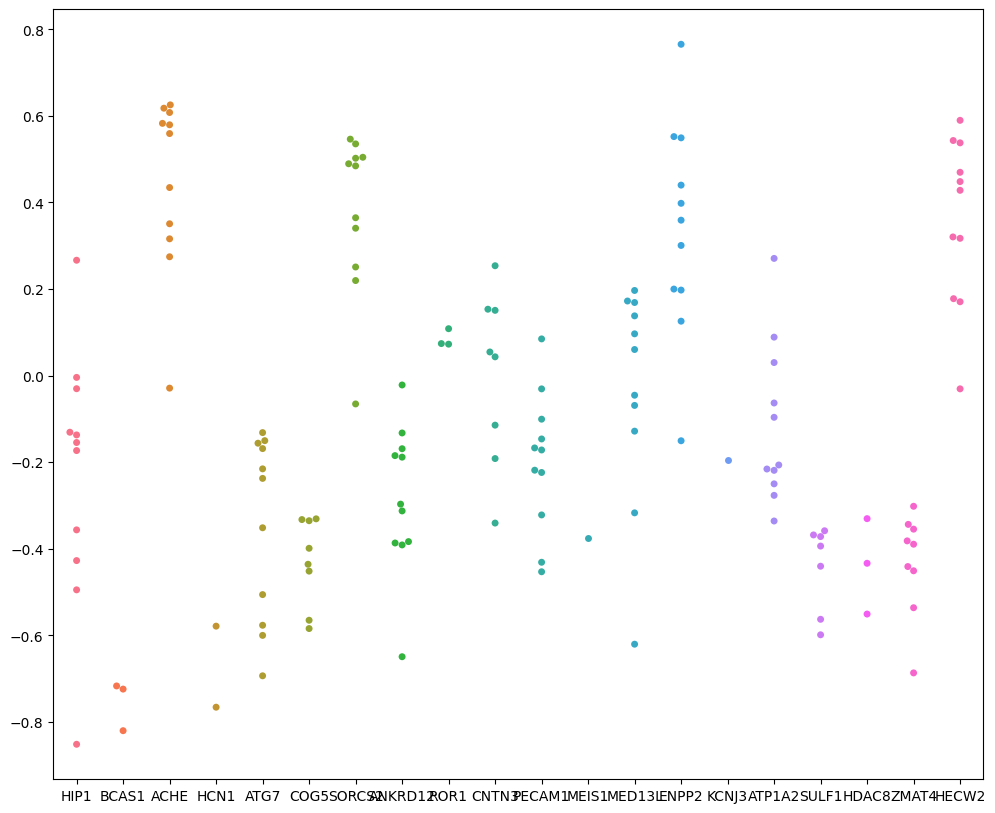

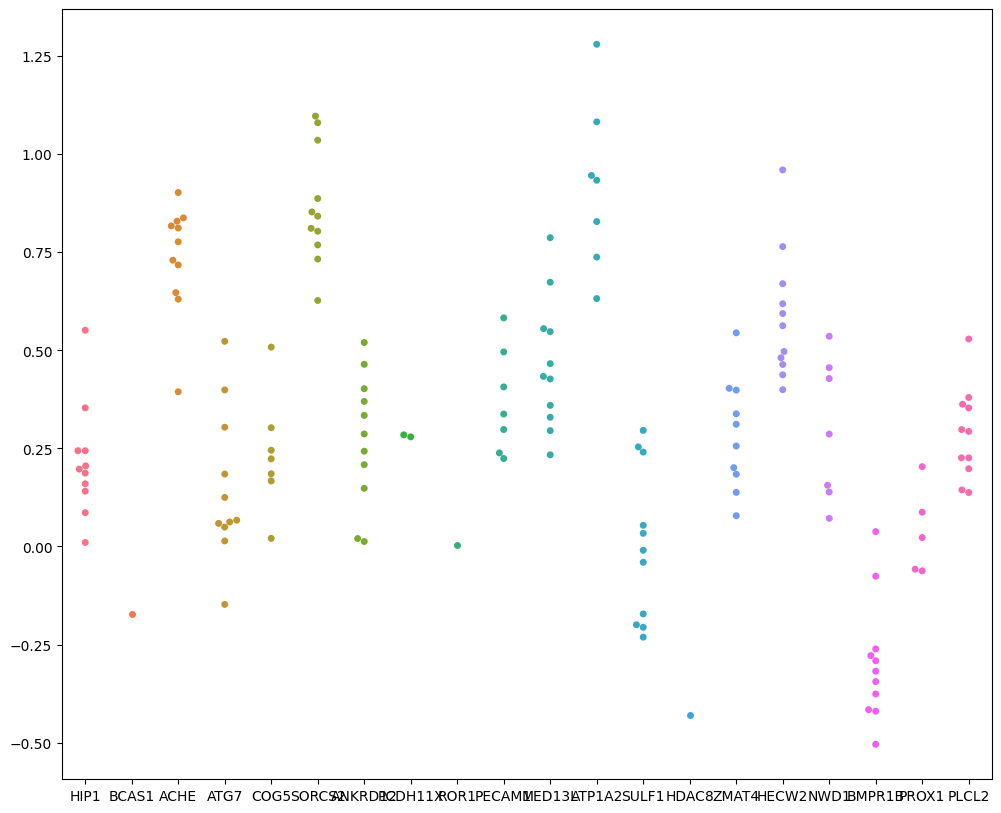

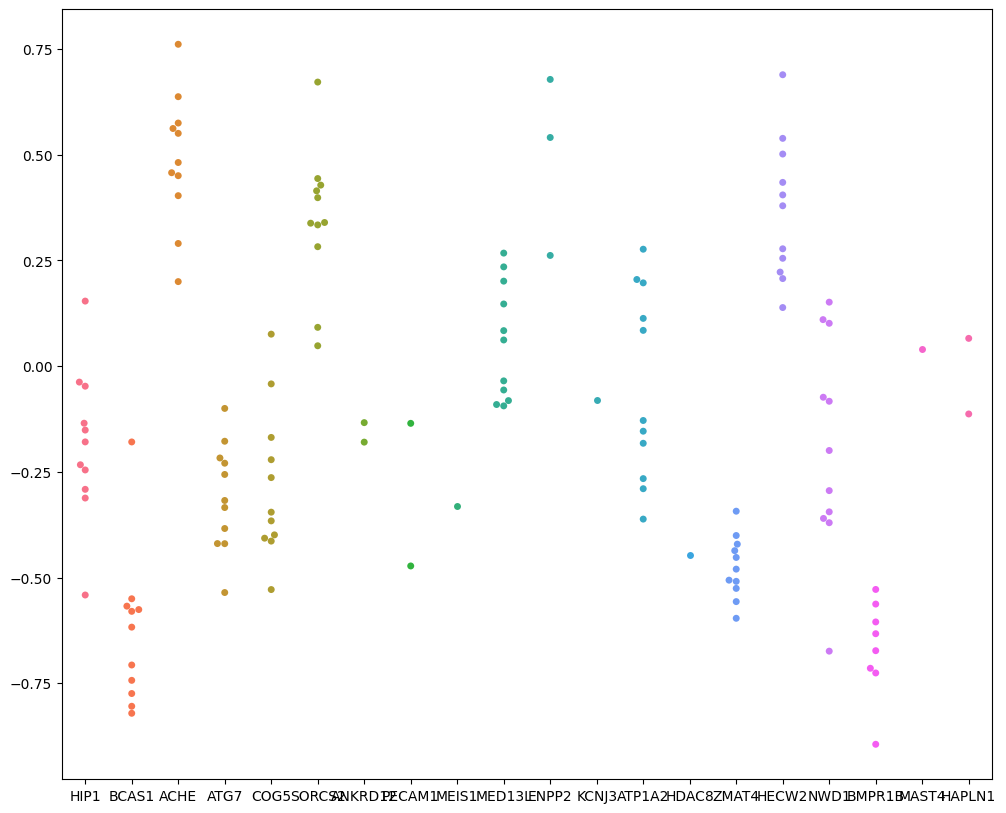

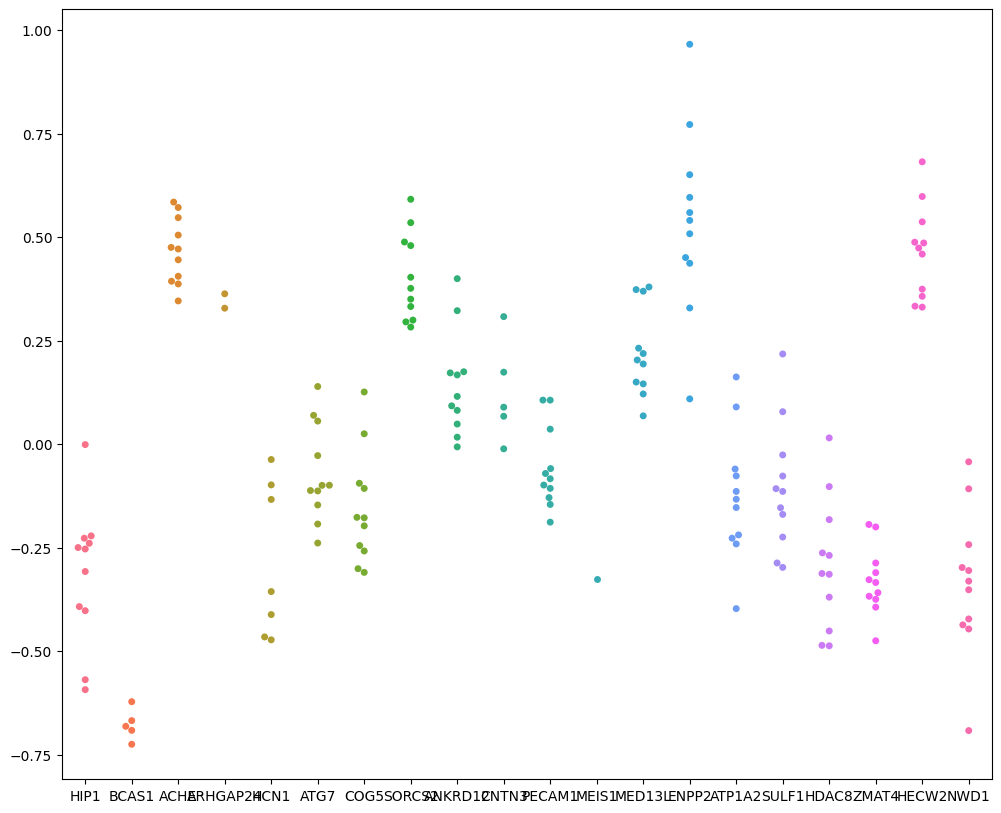

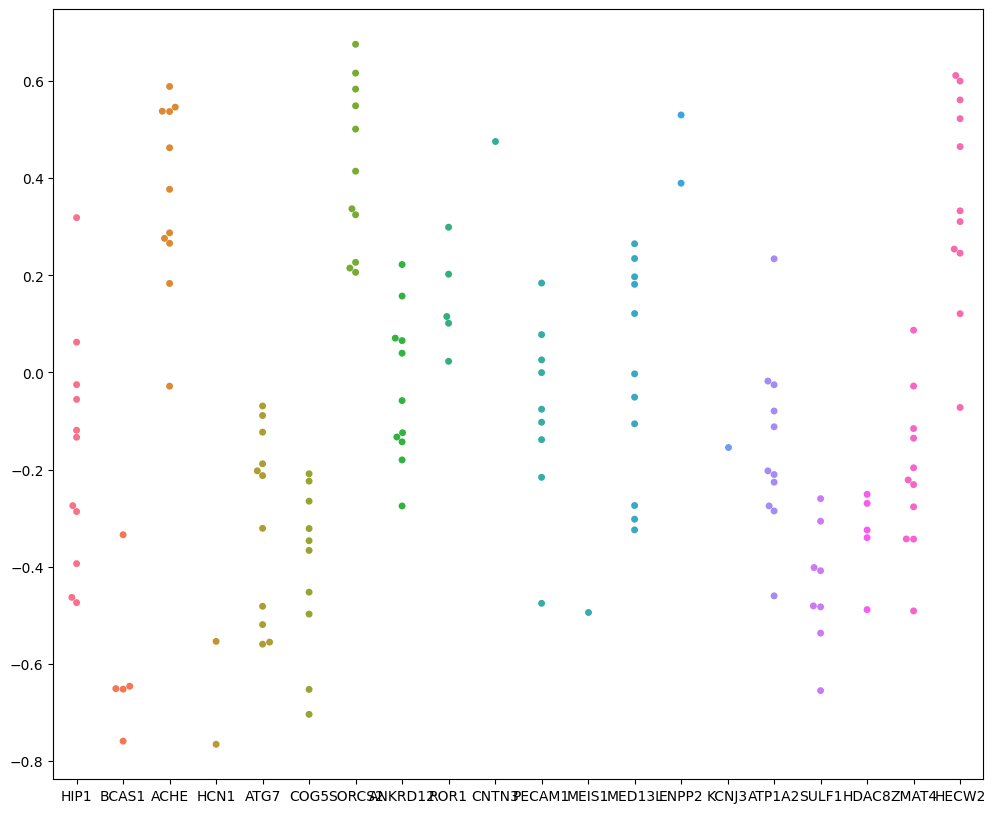

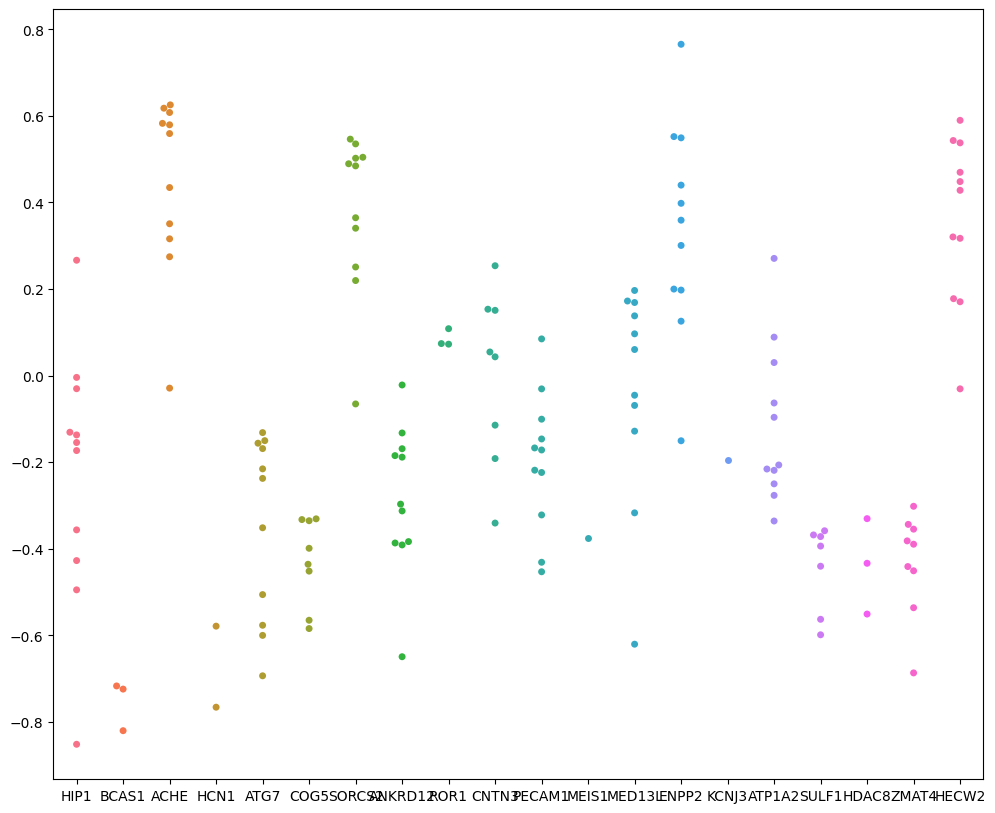

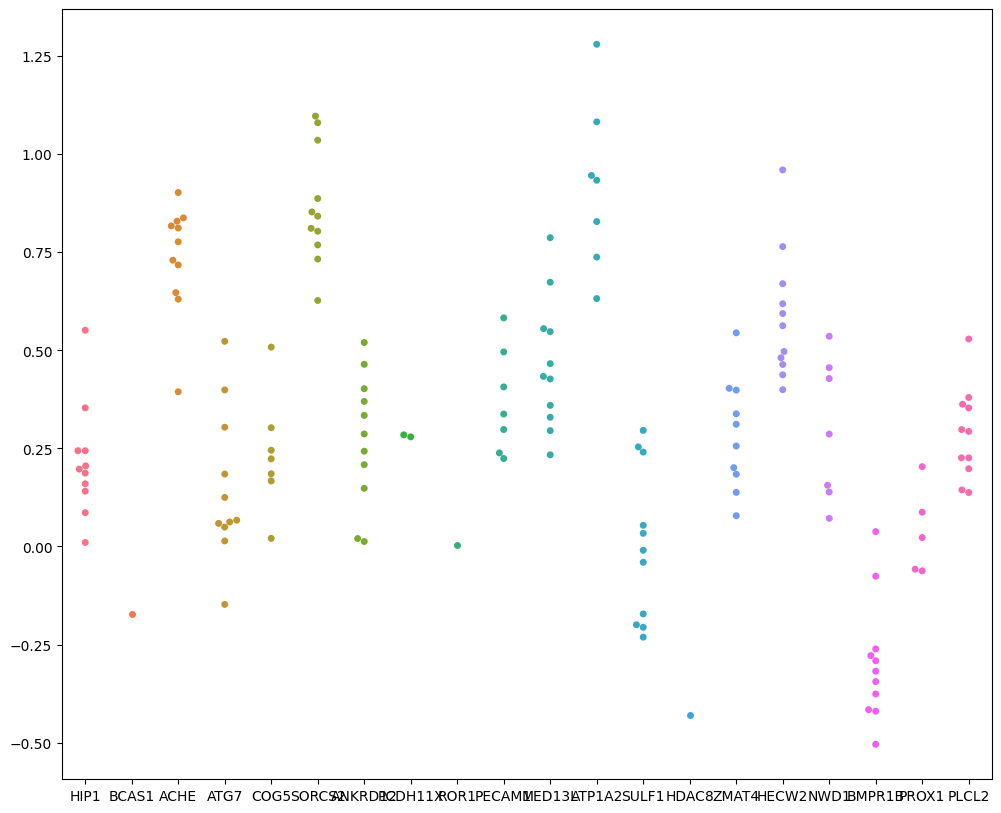

In [392]:
for derp in c_exp_results:
    plt.figure(figsize=[12,10])
 
    sns.swarmplot(np.log10(derp[1].loc[[g for g in derp[1].index][:20],:].T))

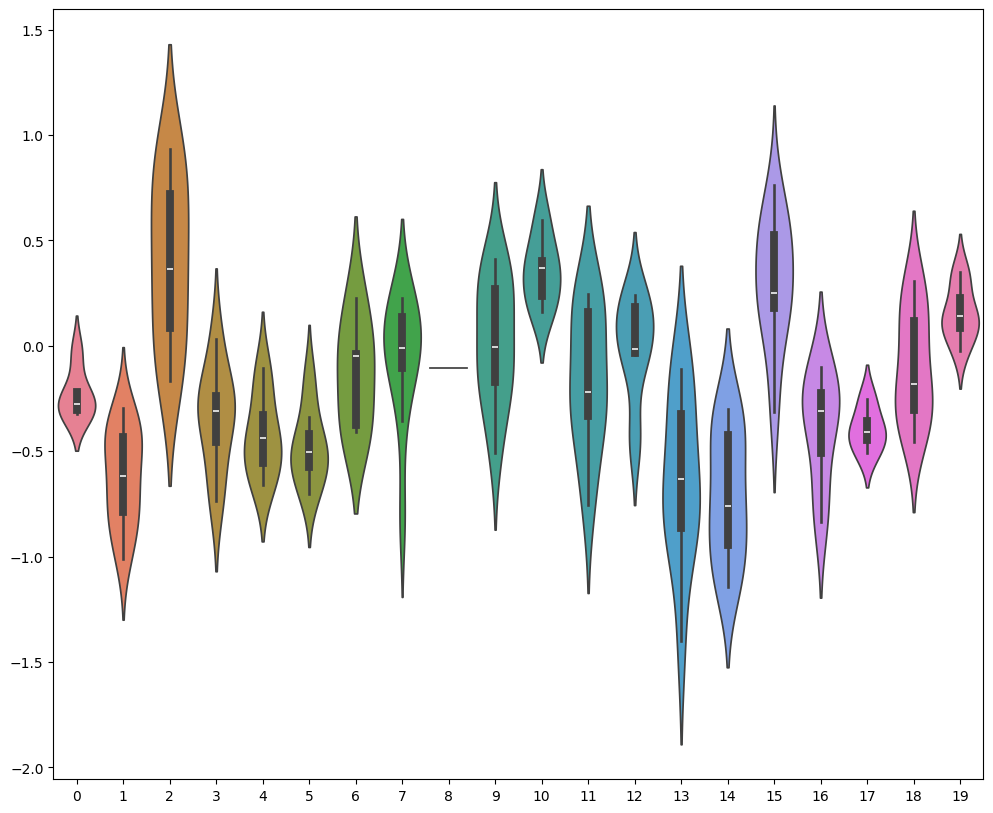

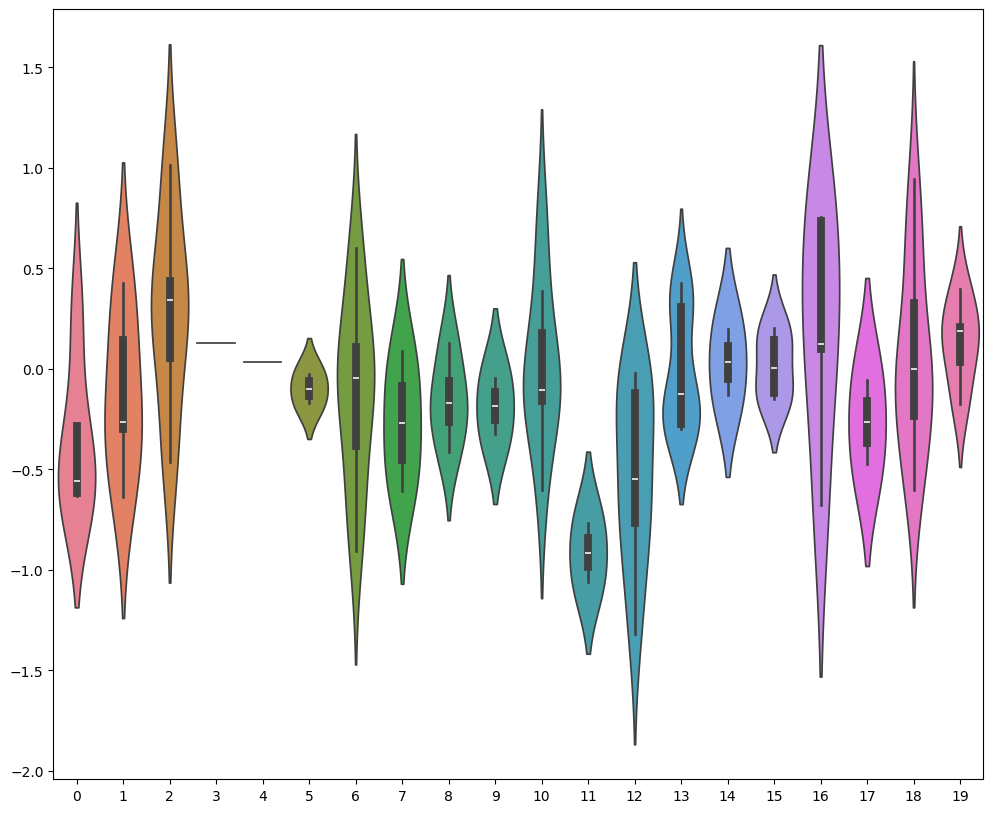

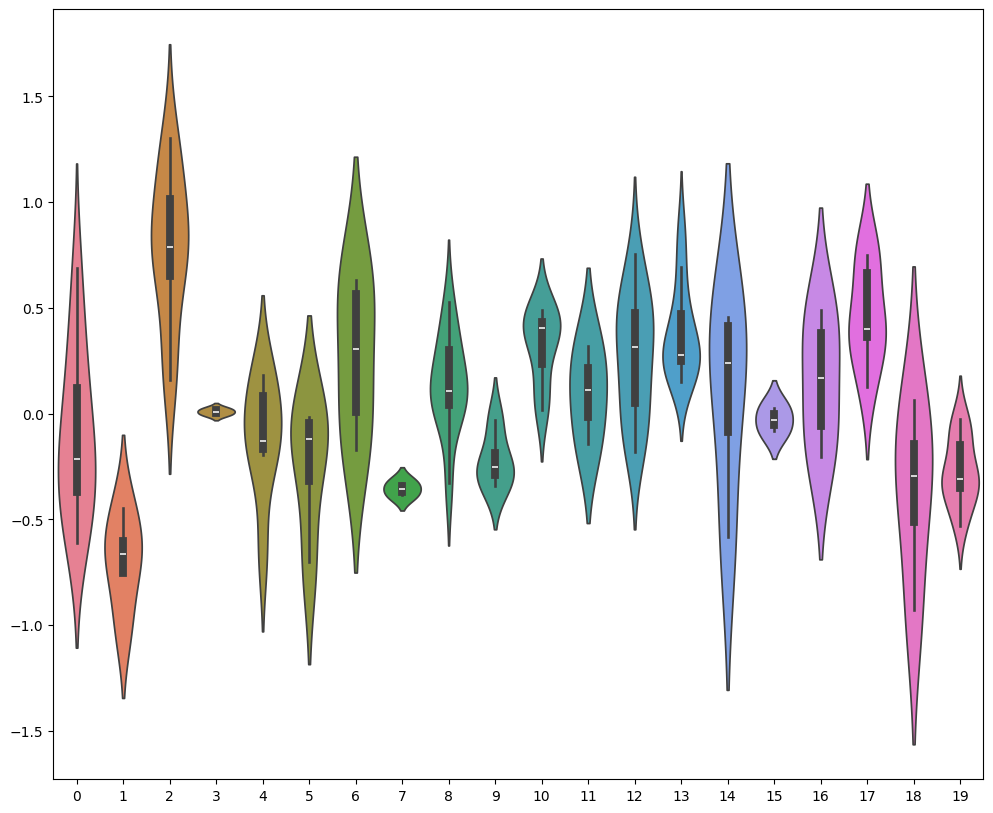

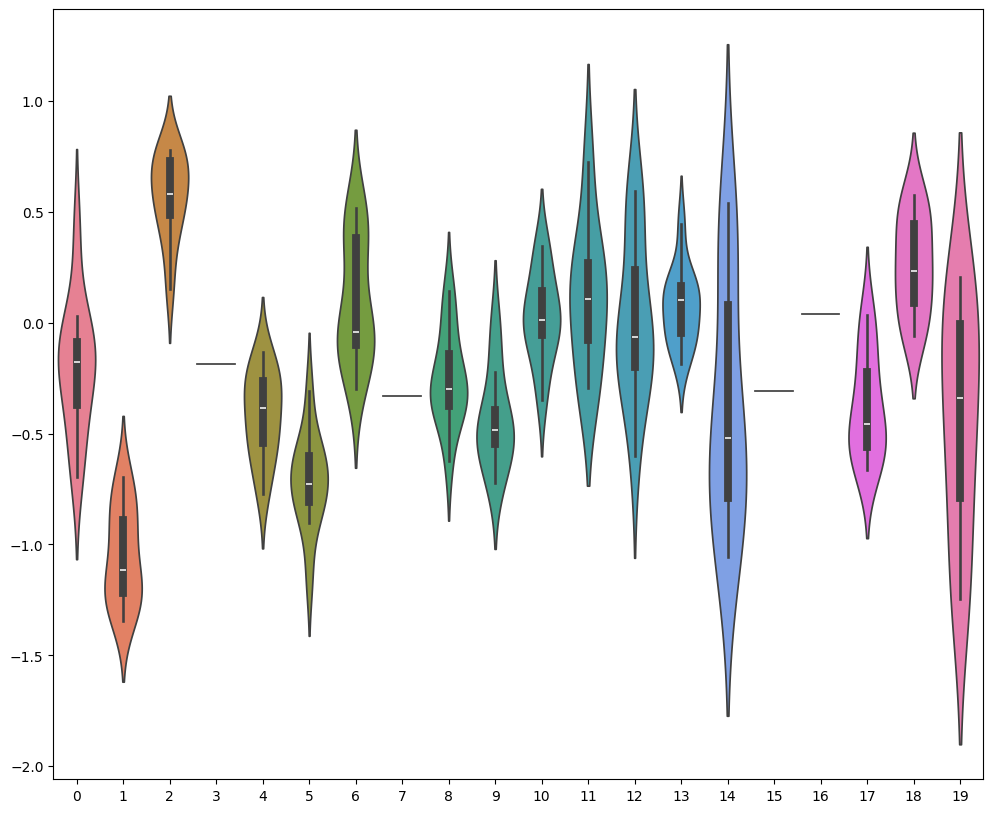

In [370]:
for derp in c_exp_results_TH:
    plt.figure(figsize=[12,10])
    sns.violinplot(np.log10(derp[1].loc[[g for g in derp[1].index][:20],:].T.values))

In [ ]:
# ok there are some useful routines here:
- find matching sections. could even use this to verify that adjacent sections are similar
- per ~subclass, go through and 

<Axes: >

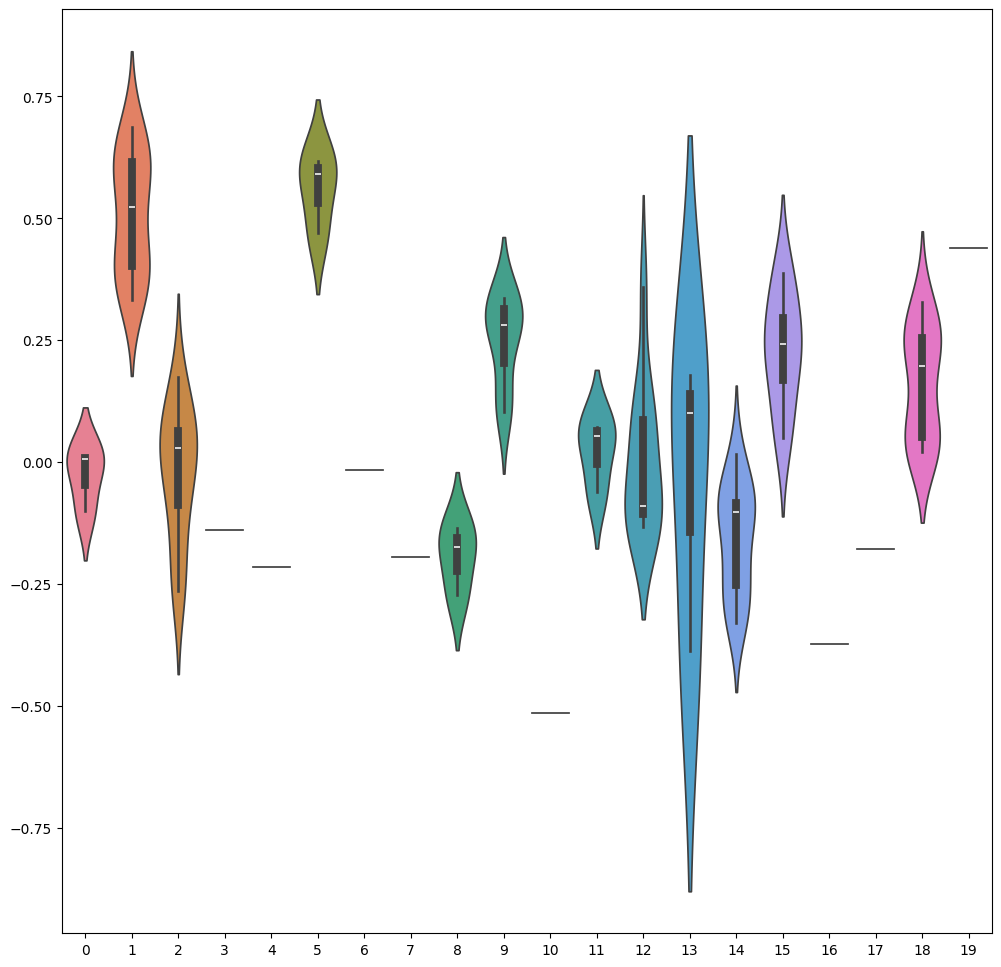

In [358]:
plt.figure(figsize=[12,12])
sns.violinplot(np.log10(derp[1].loc[[g for g in derp[1].index][:20],:].T.values))